In [7]:
import pandas as pd
import numpy as np
import os
import json
import pickle
import patoolib
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
os.getcwd()

'C:\\Users\\karth'

In [9]:
cd C://Users//karth

C:\Users\karth


In [10]:
mkdir .kaggle

A subdirectory or file .kaggle already exists.


In [11]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!patool extract us-accidents.zip

INFO patool: Extracting us-accidents.zip ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: ... us-accidents.zip extracted to `us-accidents' (local file exists).


In [13]:
dftypes = {
    'Severity': 'int8',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'End_Lat': 'float32',
    'End_Lng': 'float32',
    'Distance(mi)': 'float32',
    'Number': 'int8',
    'Temperature(F)': 'float32',
    'Wind_Chill(F)': 'float32',
}

In [14]:
df = pd.read_csv("US_Accidents_March23.csv",dtype=dftypes,low_memory=True)

In [15]:
pd.set_option('display.max_columns', None)
print(df.head(5))

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at .

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int8   
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float32
 6   Start_Lng              float32
 7   End_Lat                float32
 8   End_Lng                float32
 9   Distance(mi)           float32
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float32
 21  Wind_Chill(F)          float32
 22  Humidity(%)       

In [17]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620118e+01,-9.470249e+01,3.626181e+01,-9.572560e+01,5.618423e-01,6.166327e+01,5.825102e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272904e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710925e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [18]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'],format='mixed')

In [19]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900002,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900002,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000000,33.299999,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.099998,31.000000,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.000000,33.299999,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [20]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

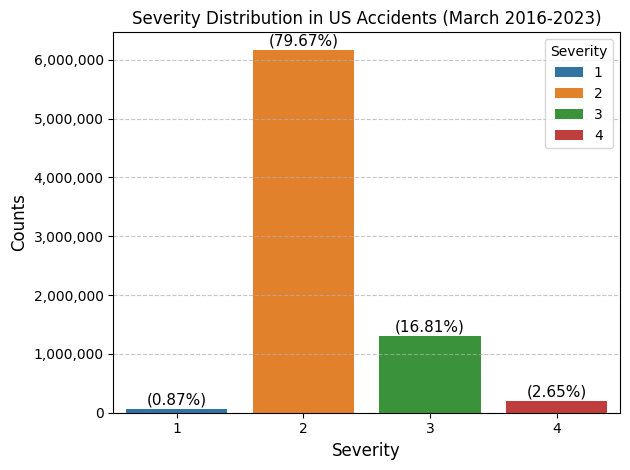

In [21]:
severity_counts = df['Severity'].value_counts().sort_index()
total_counts = df.shape[0]
severity_percentages = (severity_counts / total_counts) * 100
severity_df = pd.DataFrame({
    'Severity': severity_counts.index,
    'Counts': severity_counts.values,
    'Percentage': severity_percentages.values
})
sns.barplot(data=severity_df,x='Severity', y='Counts',hue='Severity',palette='tab10')
for i, row in severity_df.iterrows():
    plt.text(i, row['Counts'] + total_counts * 0.01, f"({row['Percentage']:.2f}%)", ha='center', fontsize=11)

plt.title('Severity Distribution in US Accidents (March 2016-2023)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
def plot_severity_distribution(data, group_by_column, figsize=(12, 8), top_n=None):
    grouped_data = data.groupby([group_by_column, 'Severity']).size().reset_index(name='Counts')
    total_counts_per_group = grouped_data.groupby(group_by_column)['Counts'].transform('sum')
    grouped_data['Percentage'] = (grouped_data['Counts'] / total_counts_per_group) * 100
    if top_n:
        top_groups = grouped_data.groupby(group_by_column)['Counts'].sum().nlargest(top_n).index
        grouped_data = grouped_data[grouped_data[group_by_column].isin(top_groups)]
    pivot_counts = grouped_data.pivot(index=group_by_column, columns='Severity', values='Counts').fillna(0)
    pivot_percentages = grouped_data.pivot(index=group_by_column, columns='Severity', values='Percentage').fillna(0)
    pivot_counts['Total'] = pivot_counts.sum(axis=1)
    pivot_counts = pivot_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

    ax = pivot_counts.plot(
        kind='bar', 
        stacked=True, 
        colormap='plasma', 
        figsize=figsize, 
        width=0.8
    )
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.title(f'Number of Cases by Severity and {group_by_column}', fontsize=16)
    plt.xlabel(group_by_column, fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(title='Severity Level', fontsize=10)
    plt.tight_layout()
    plt.show() 


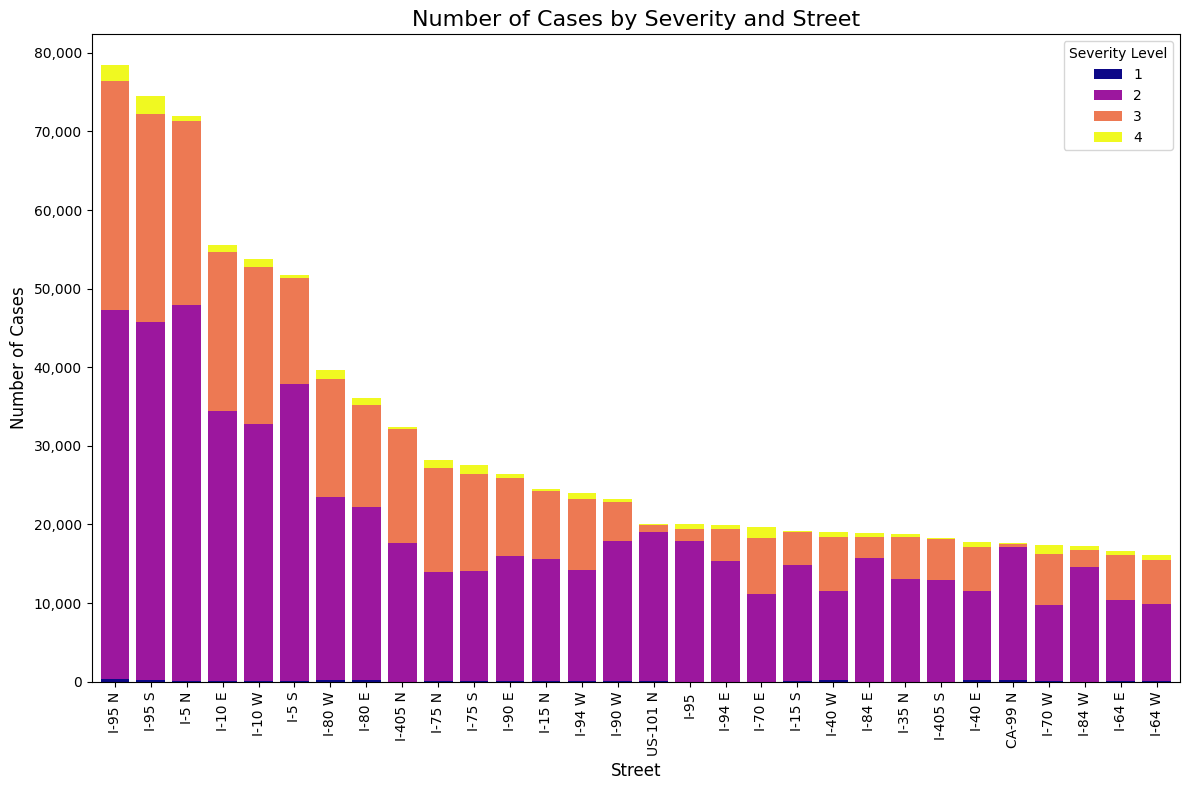

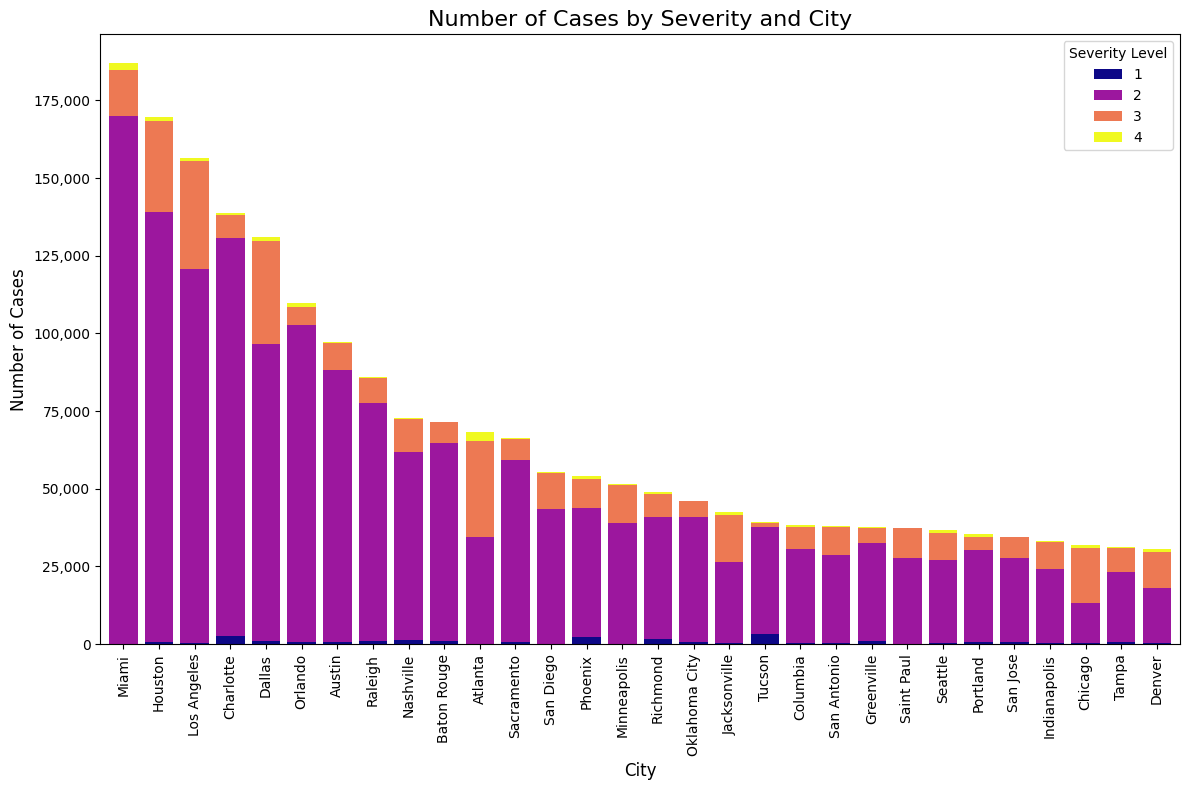

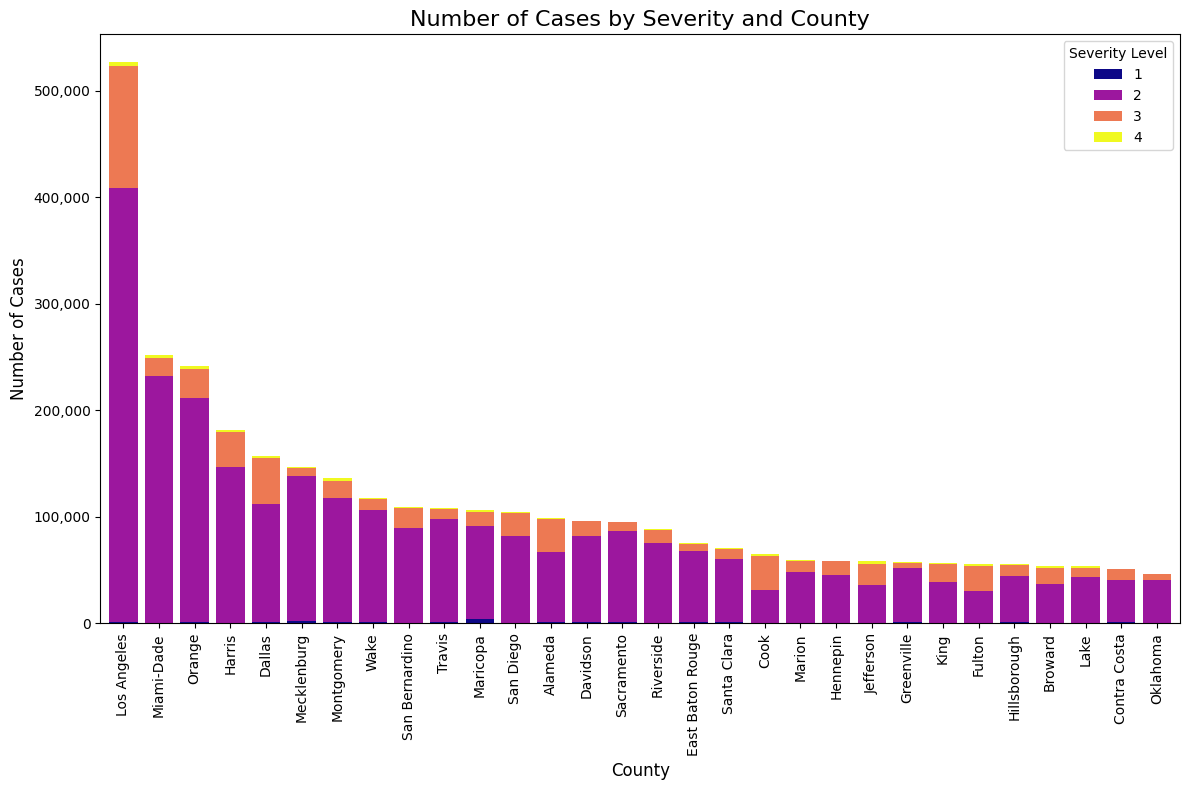

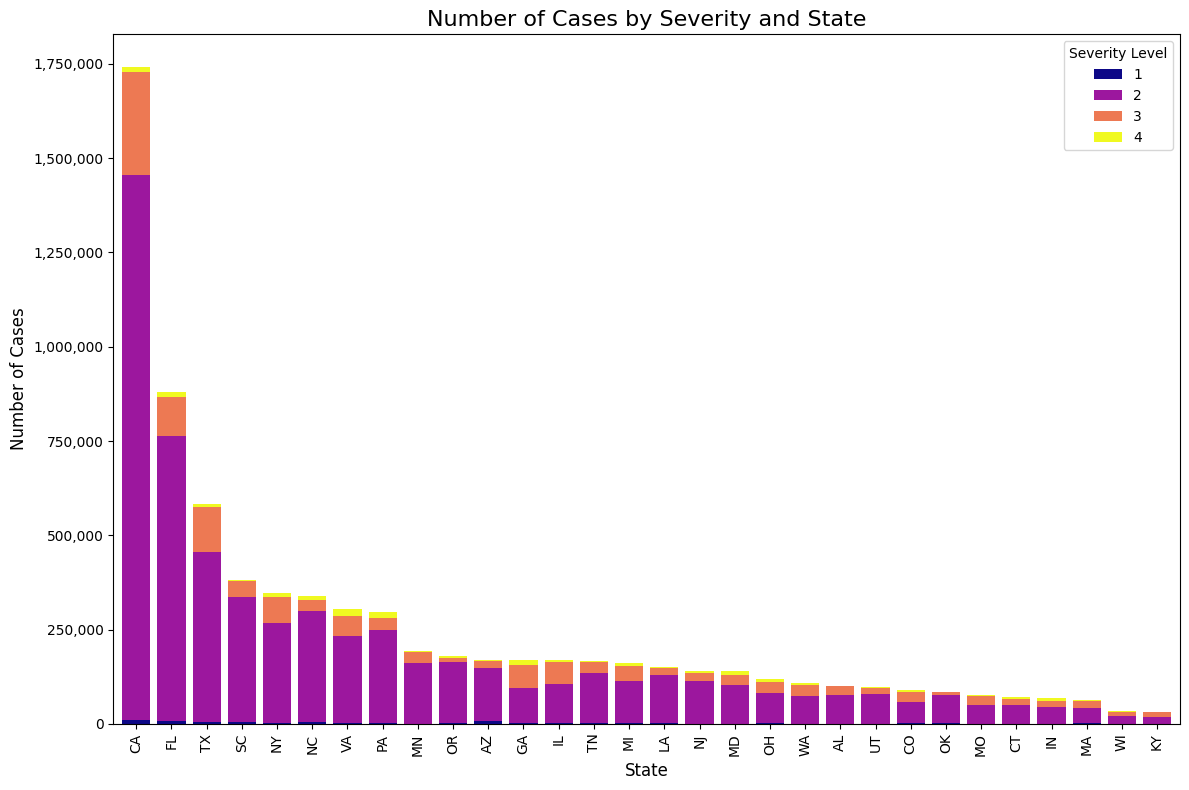

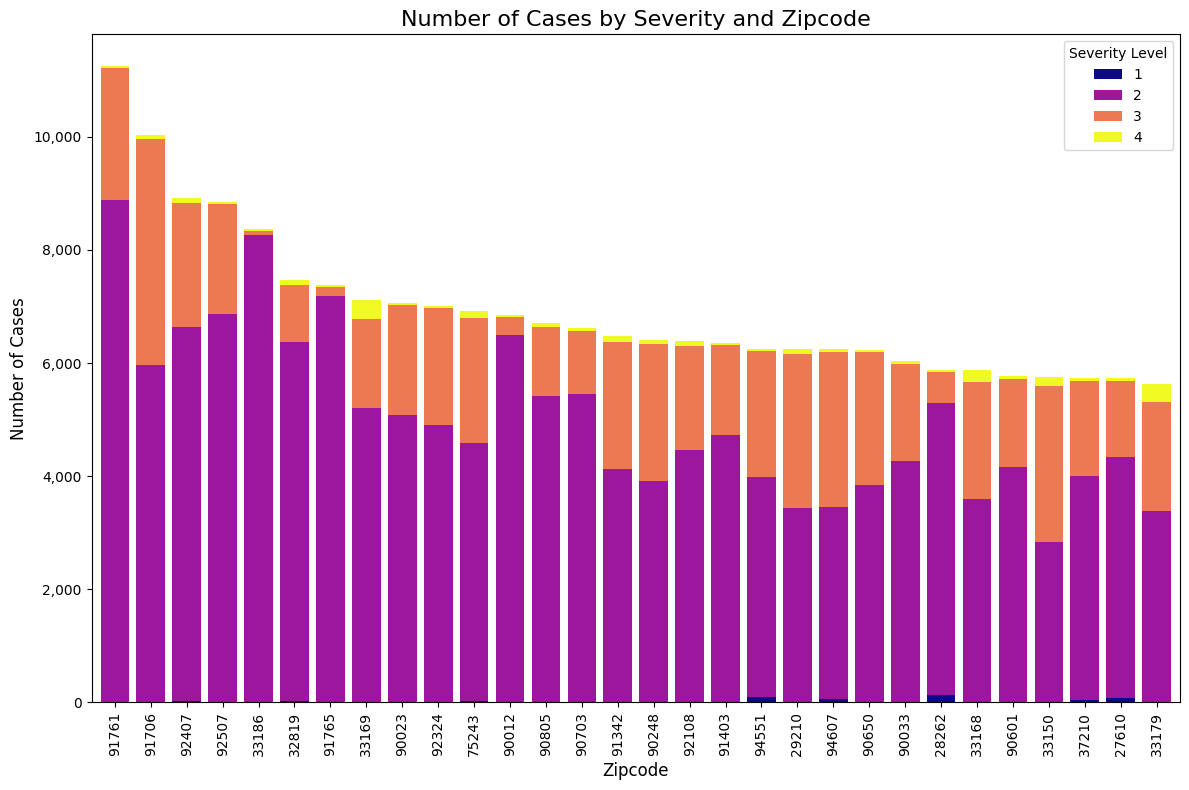

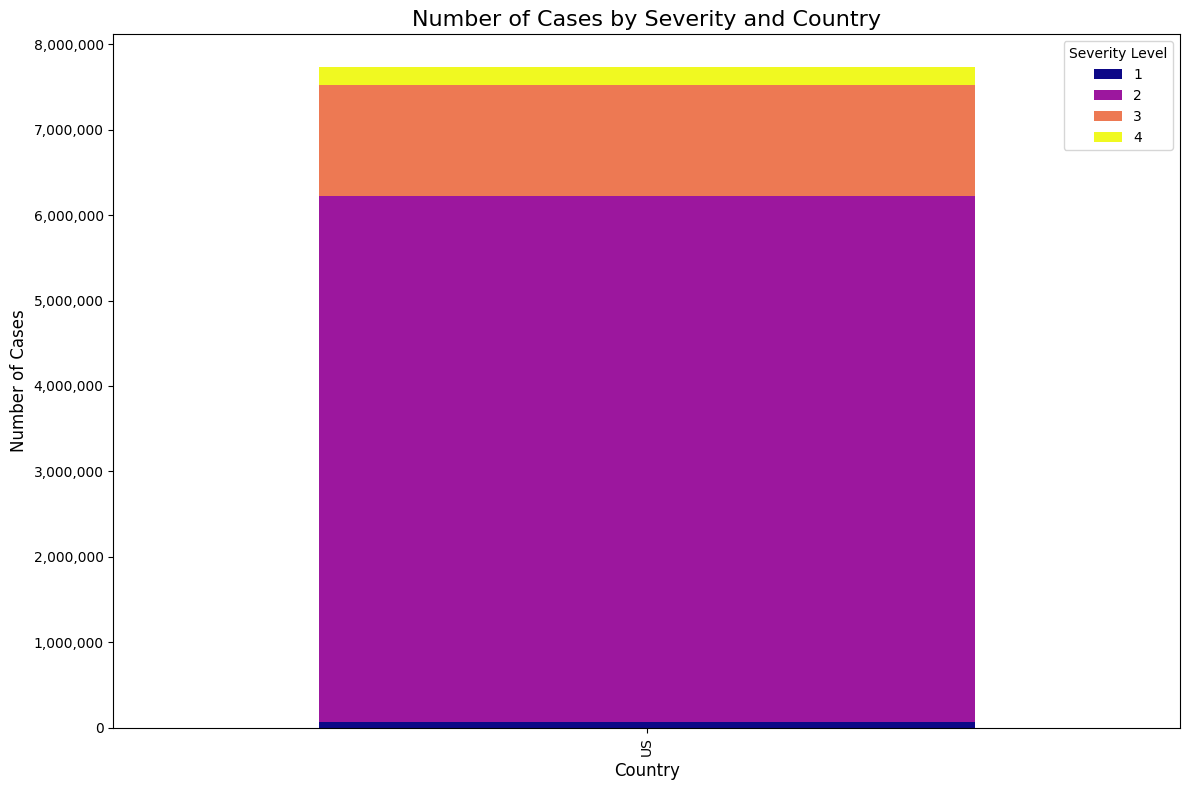

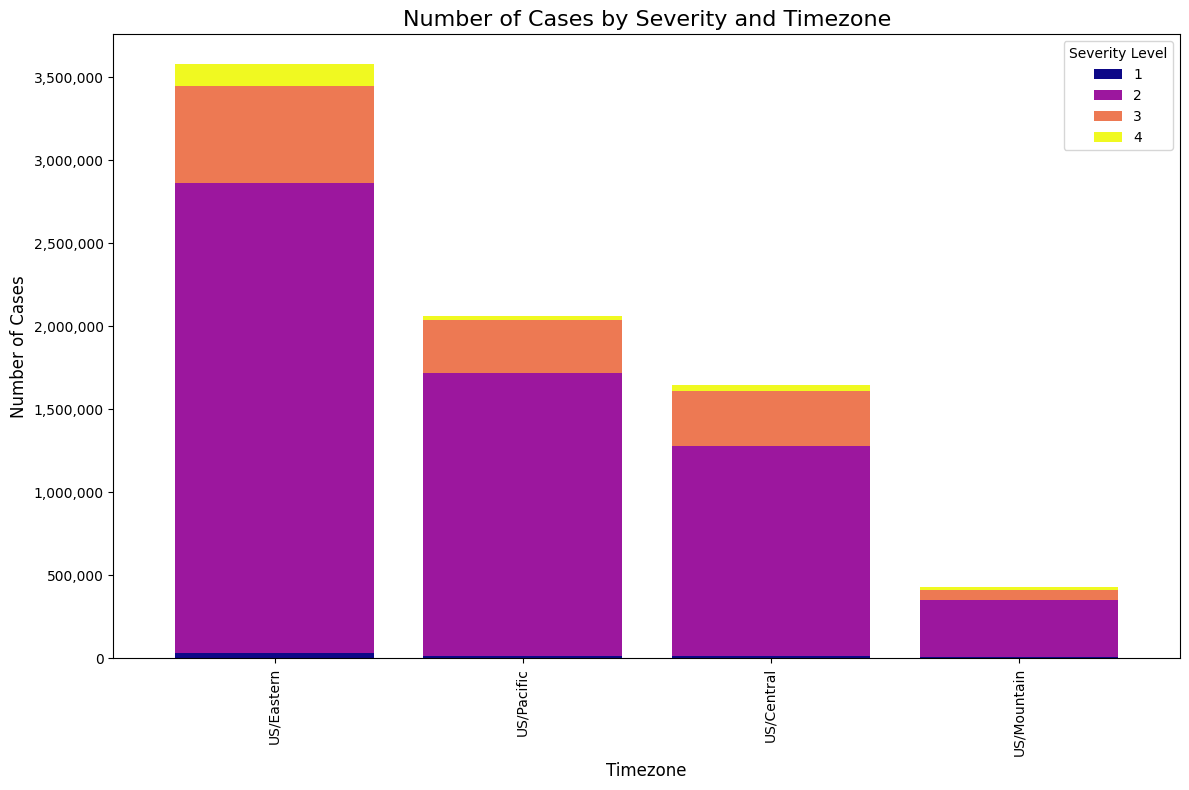

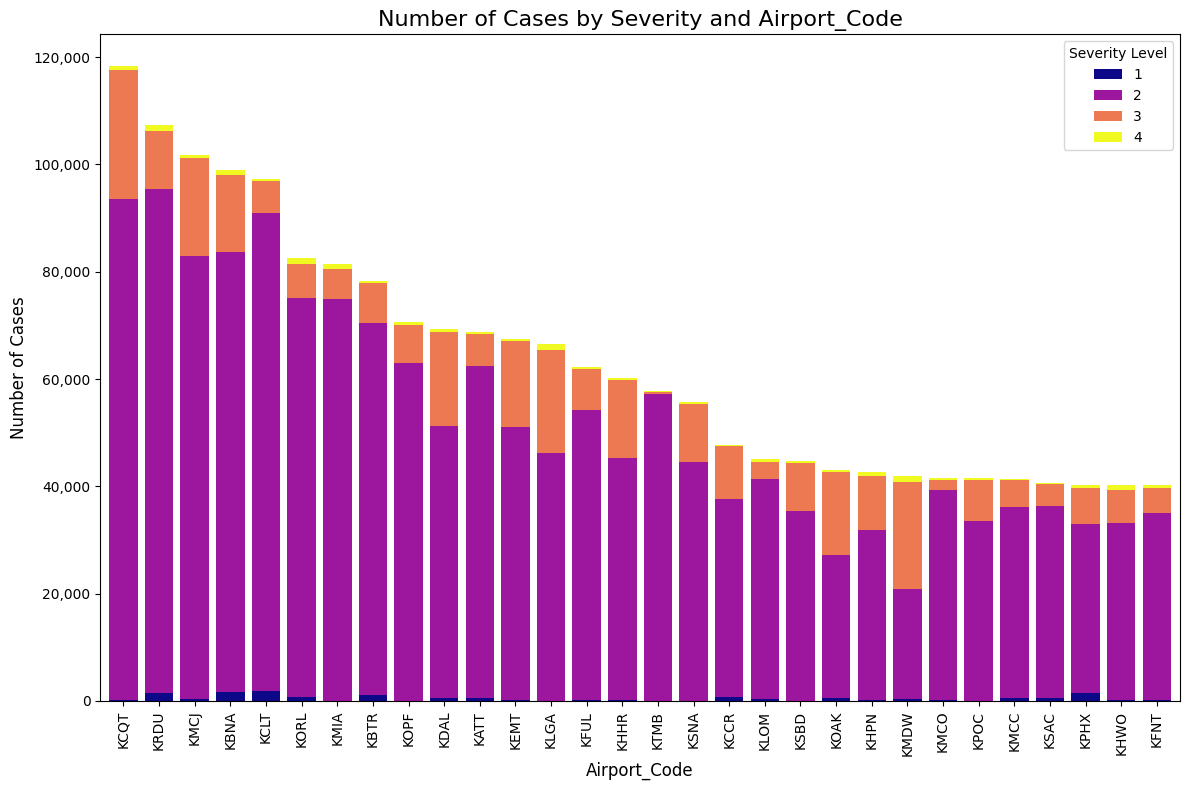

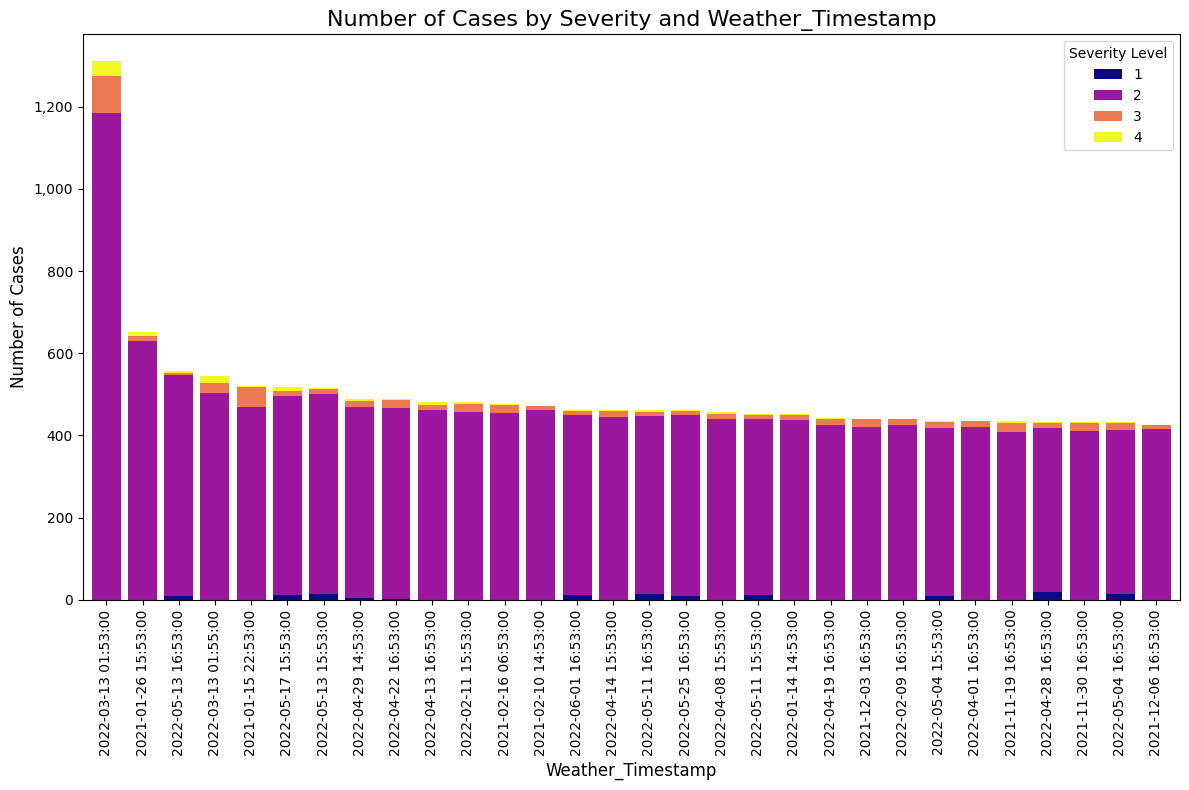

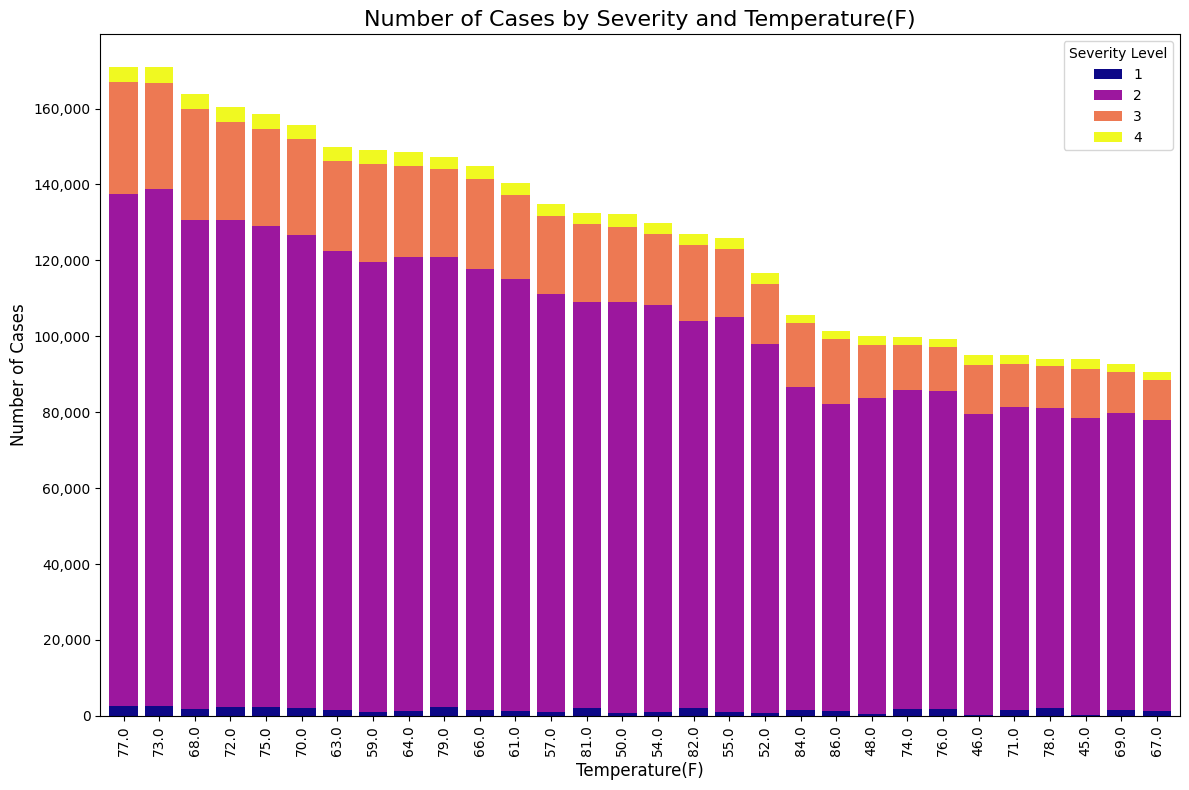

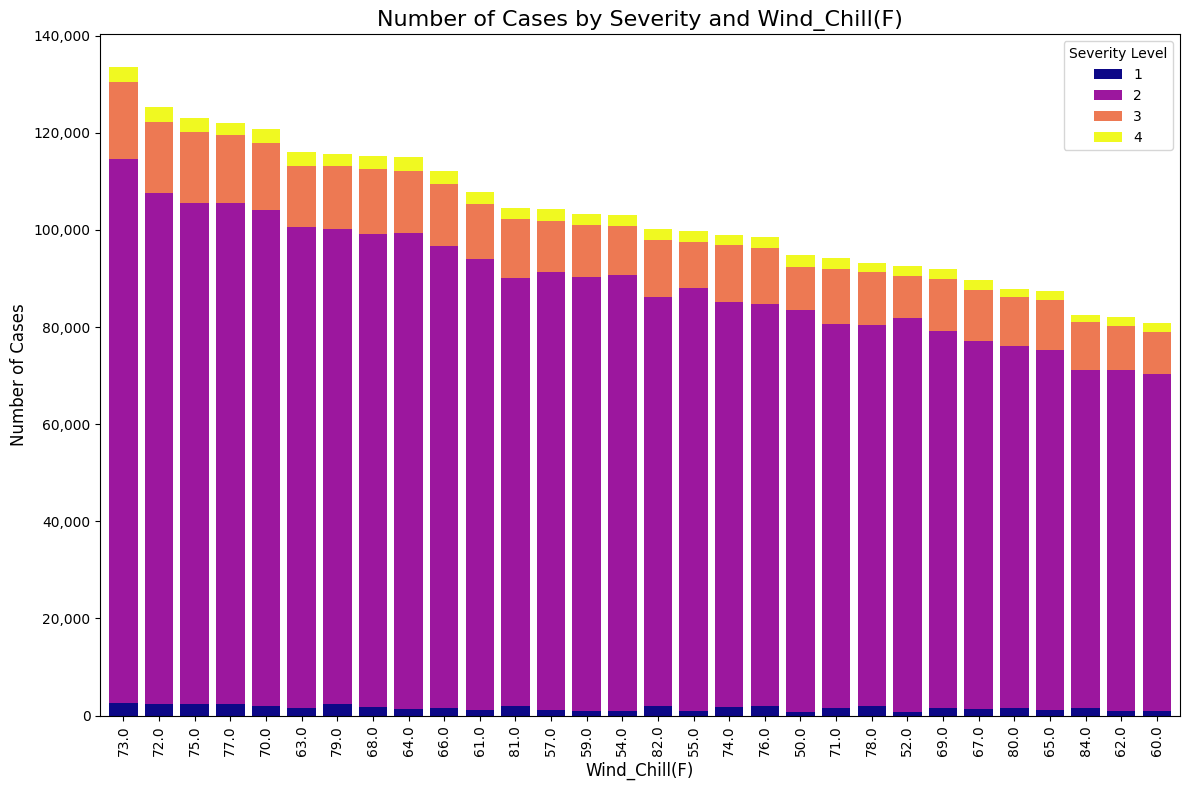

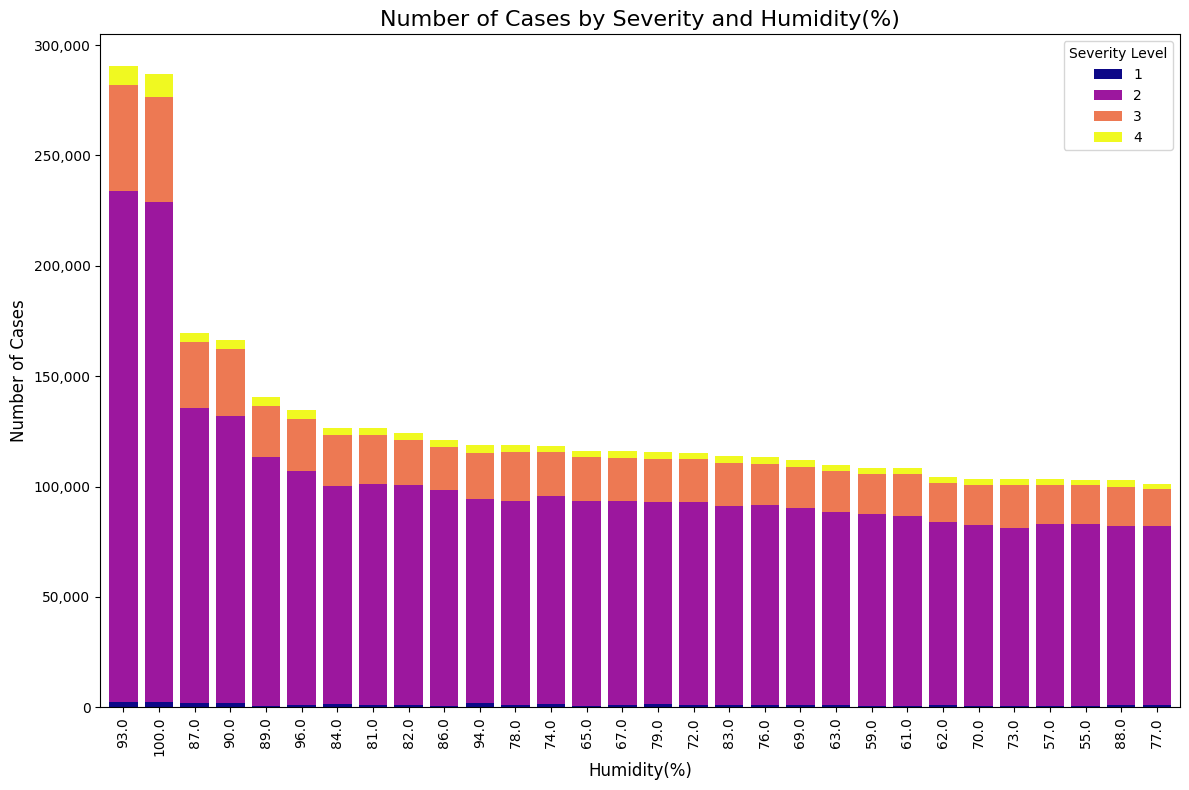

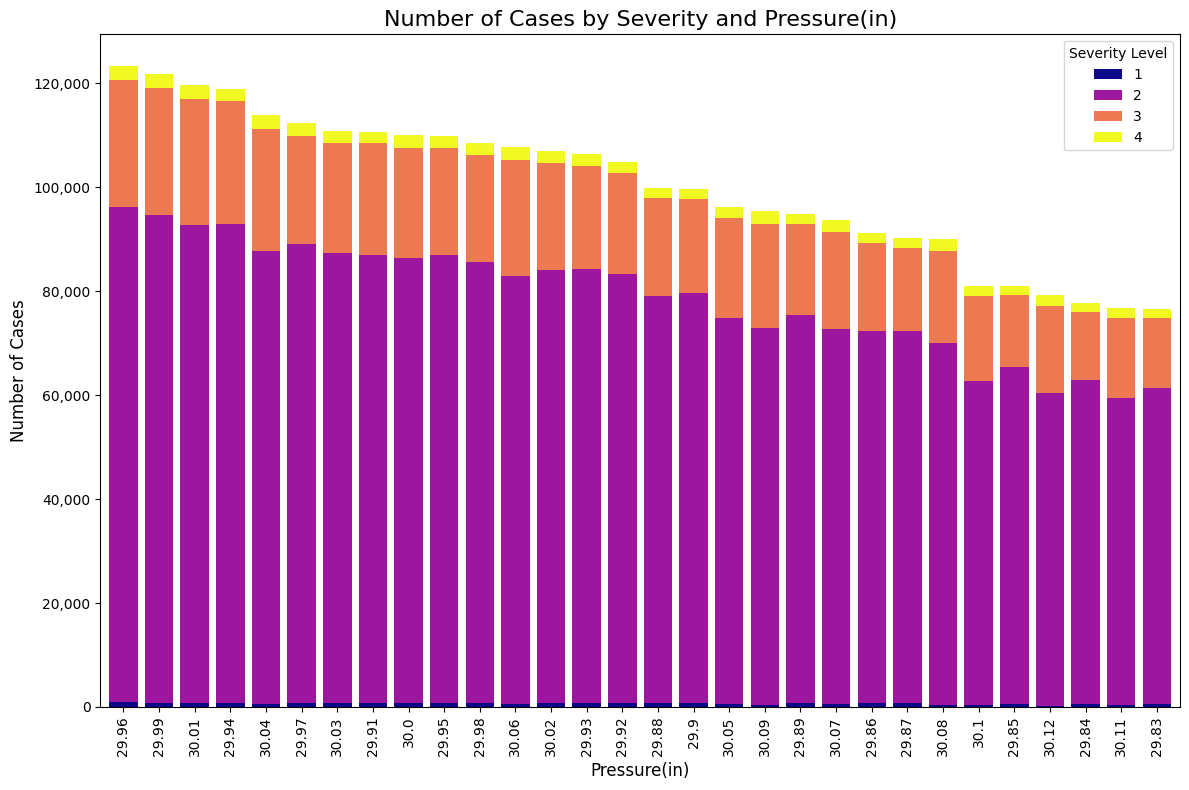

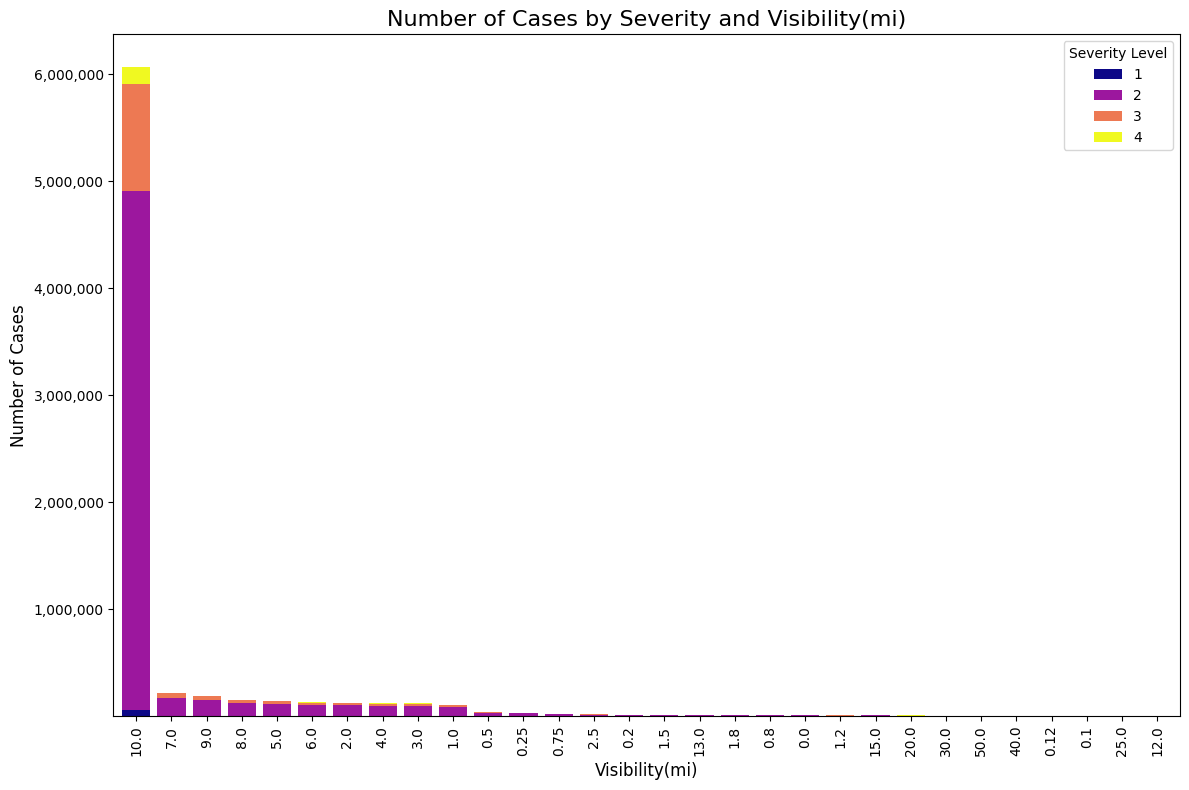

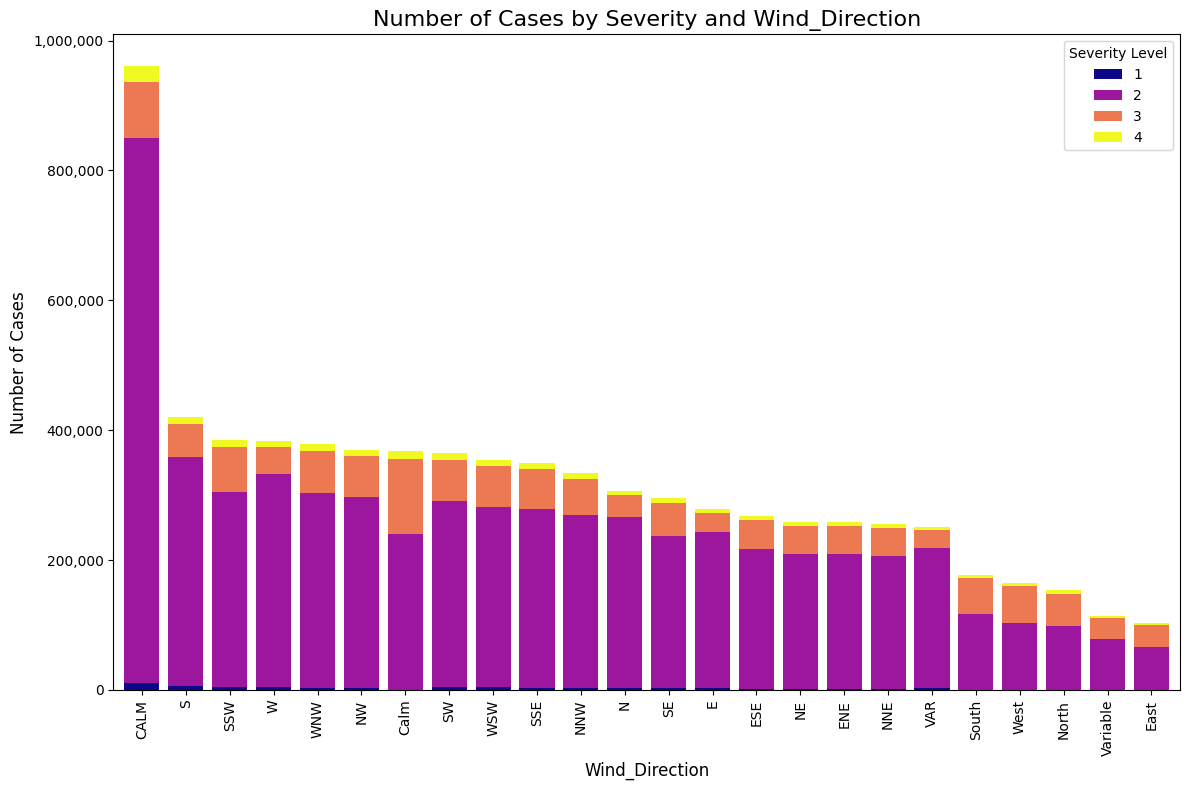

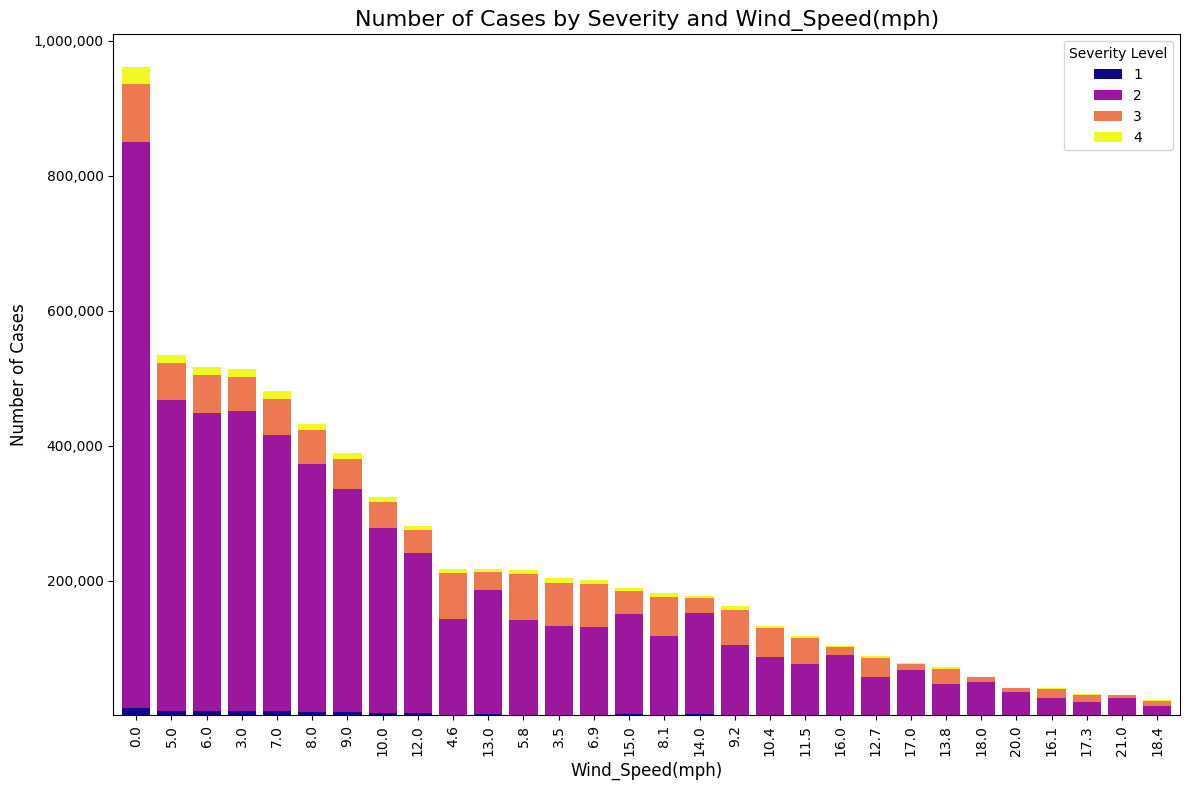

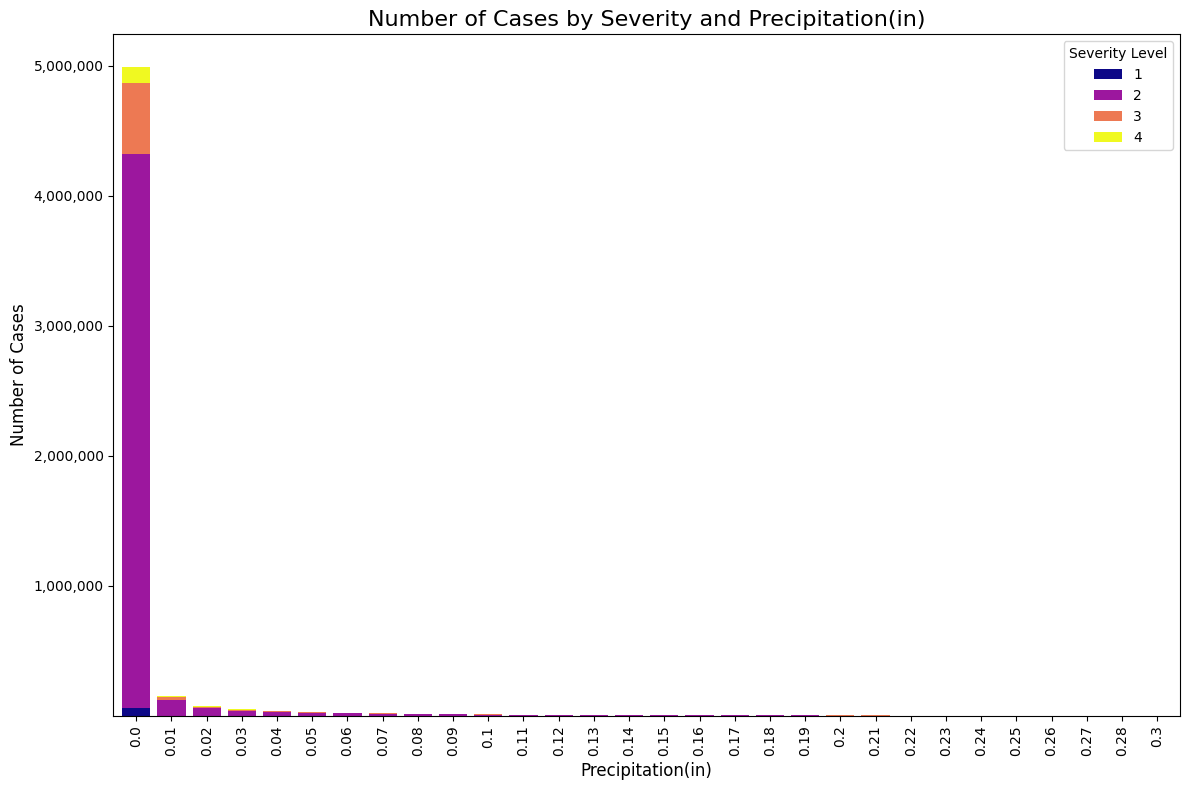

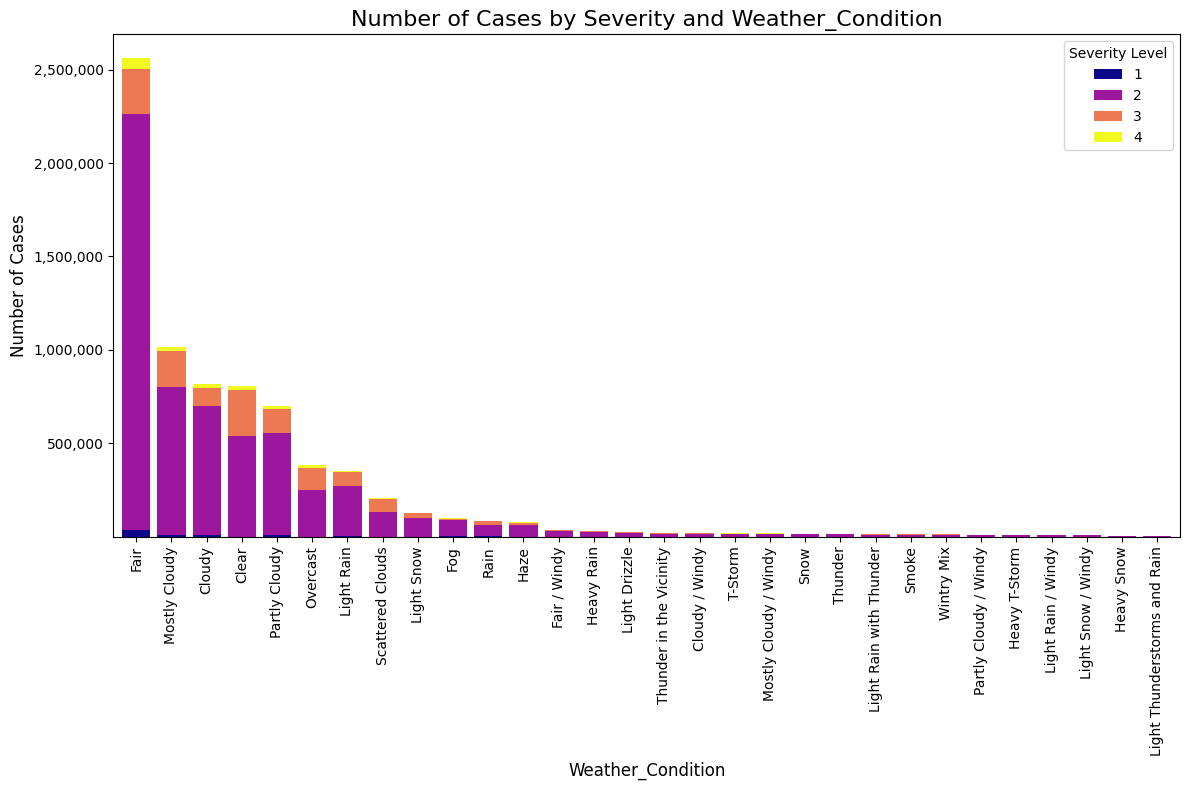

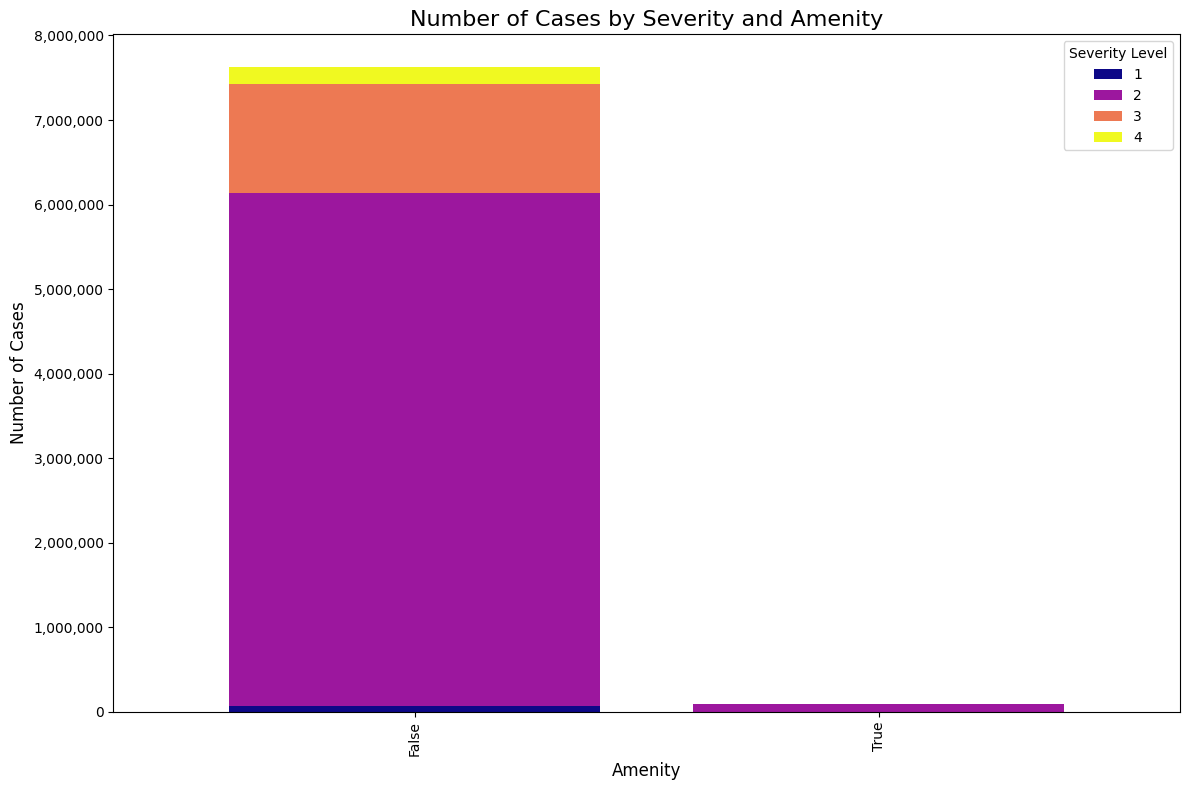

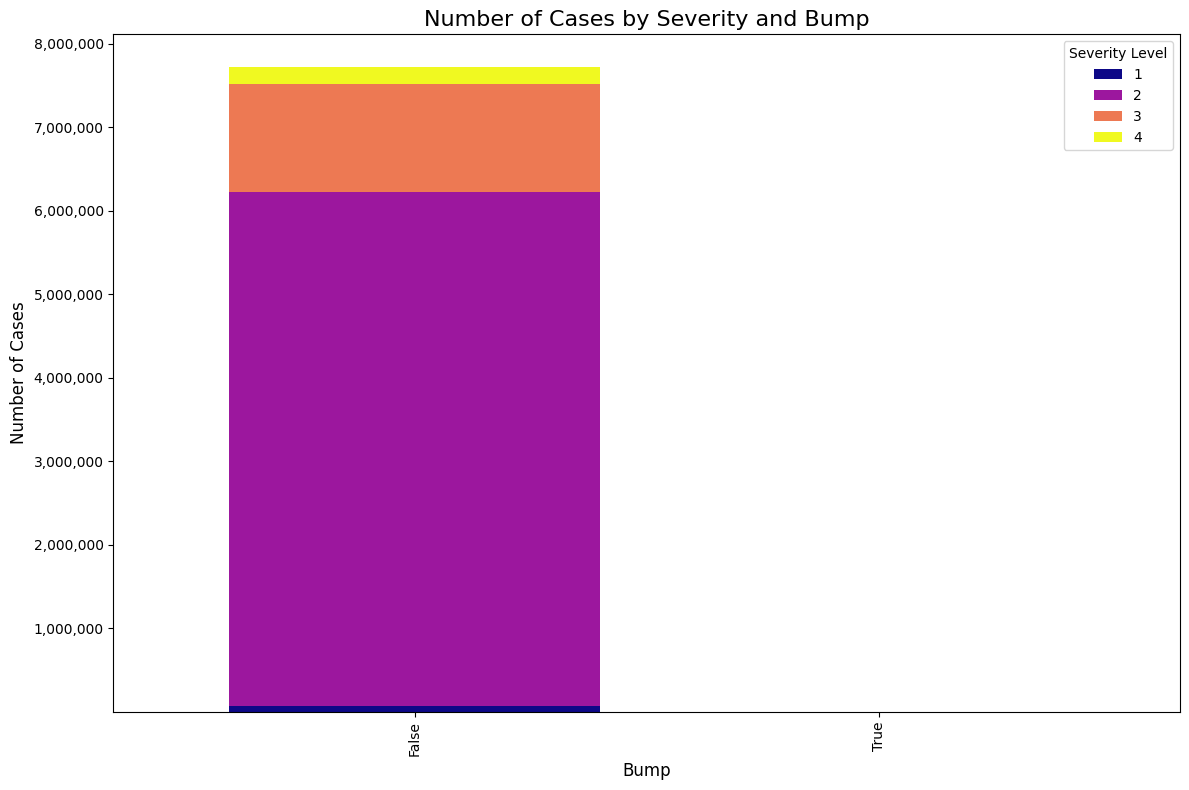

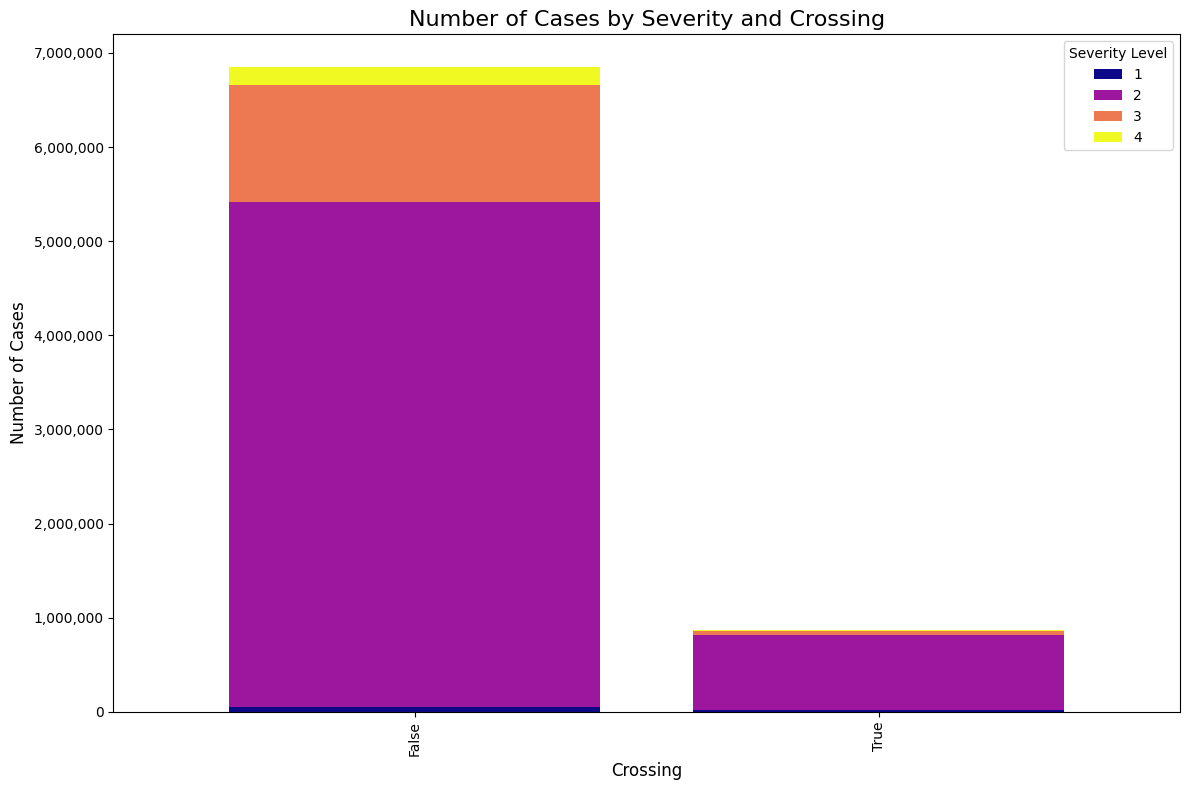

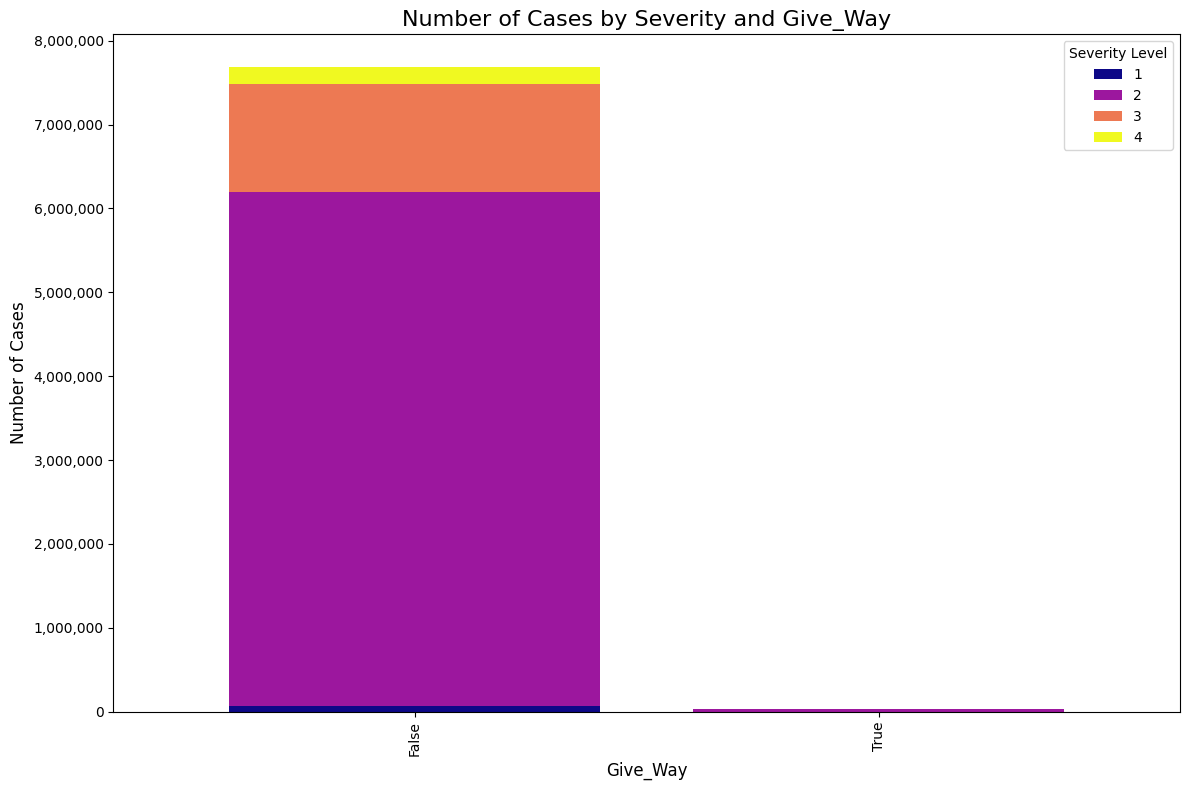

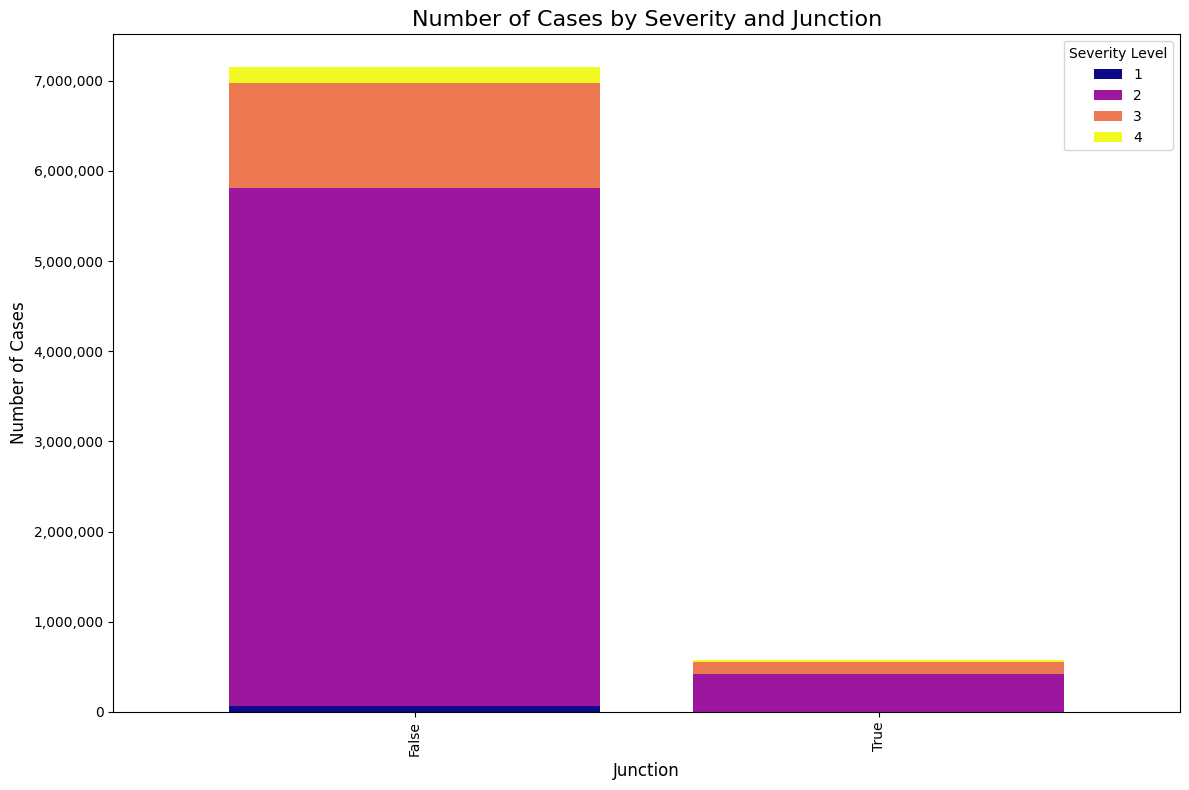

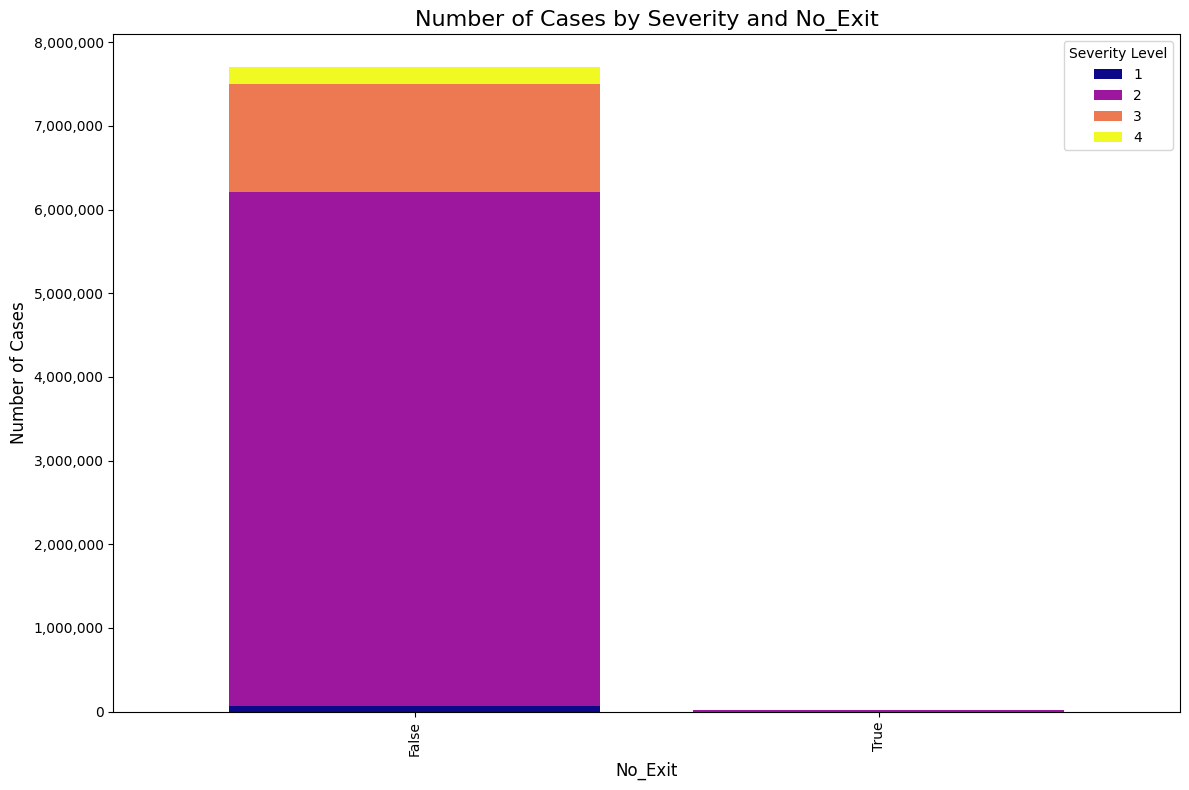

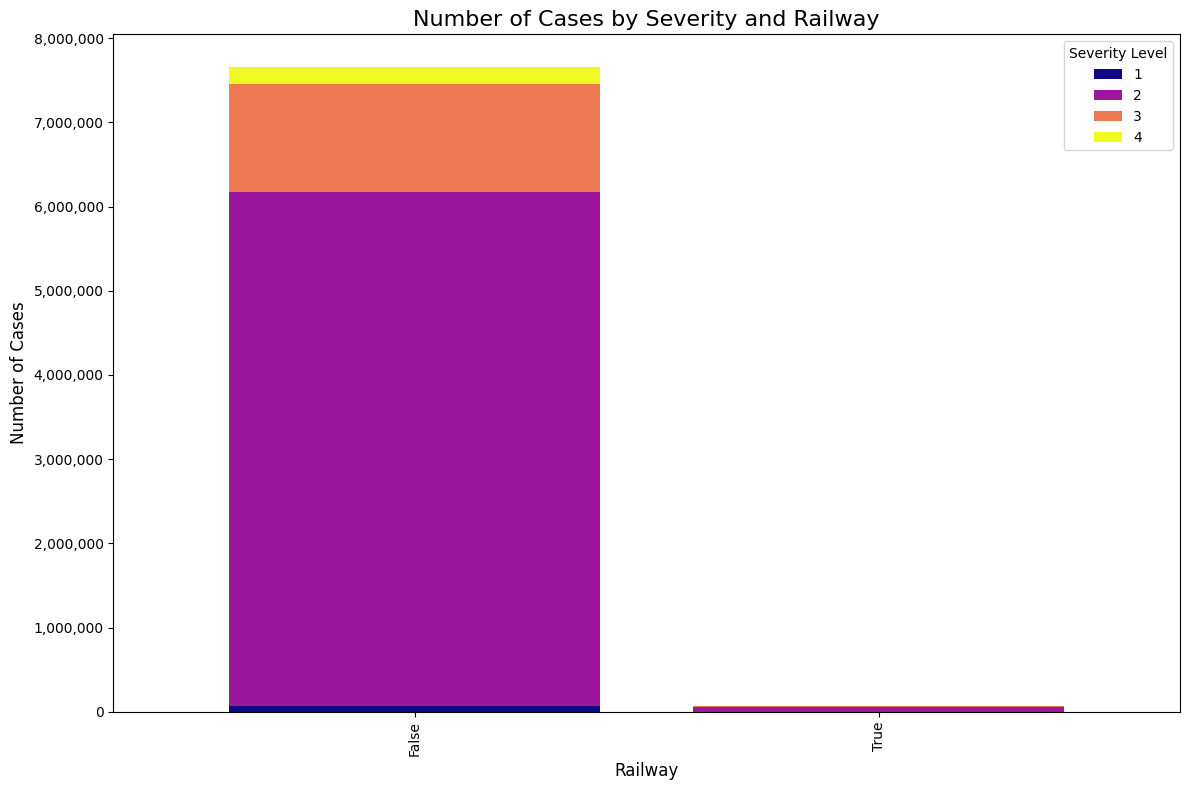

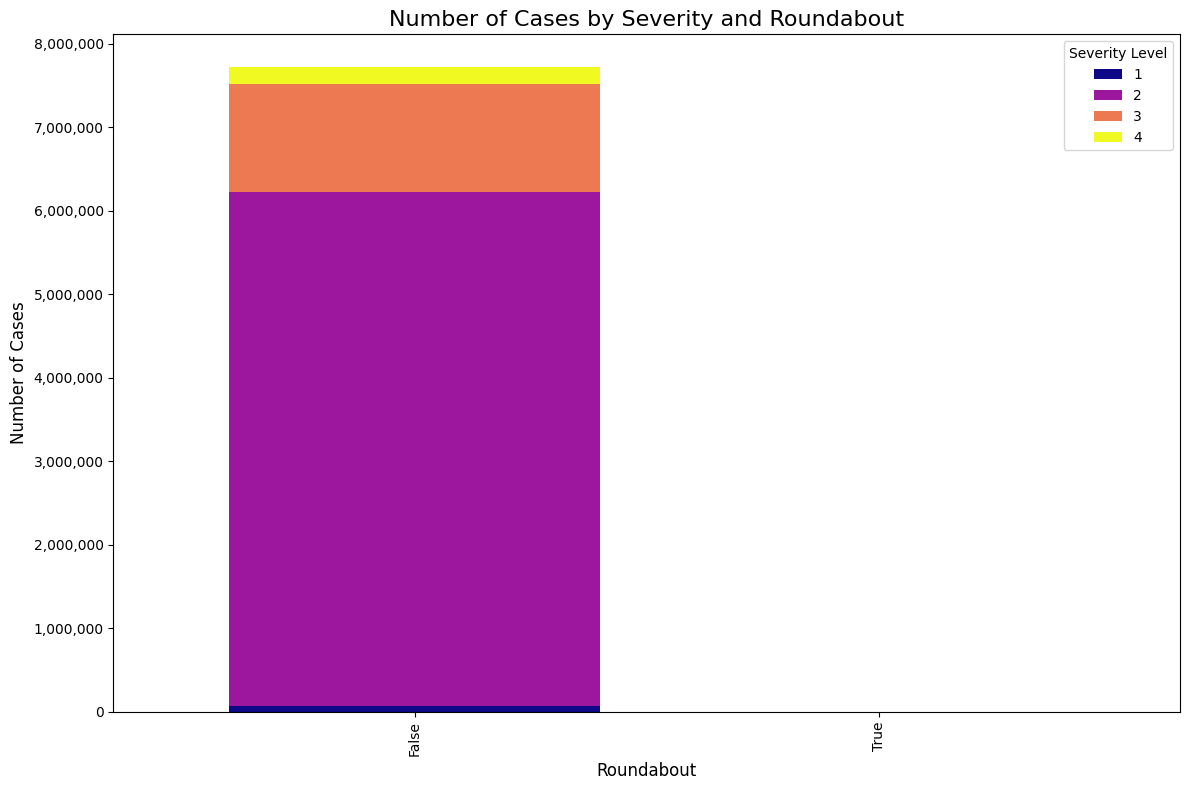

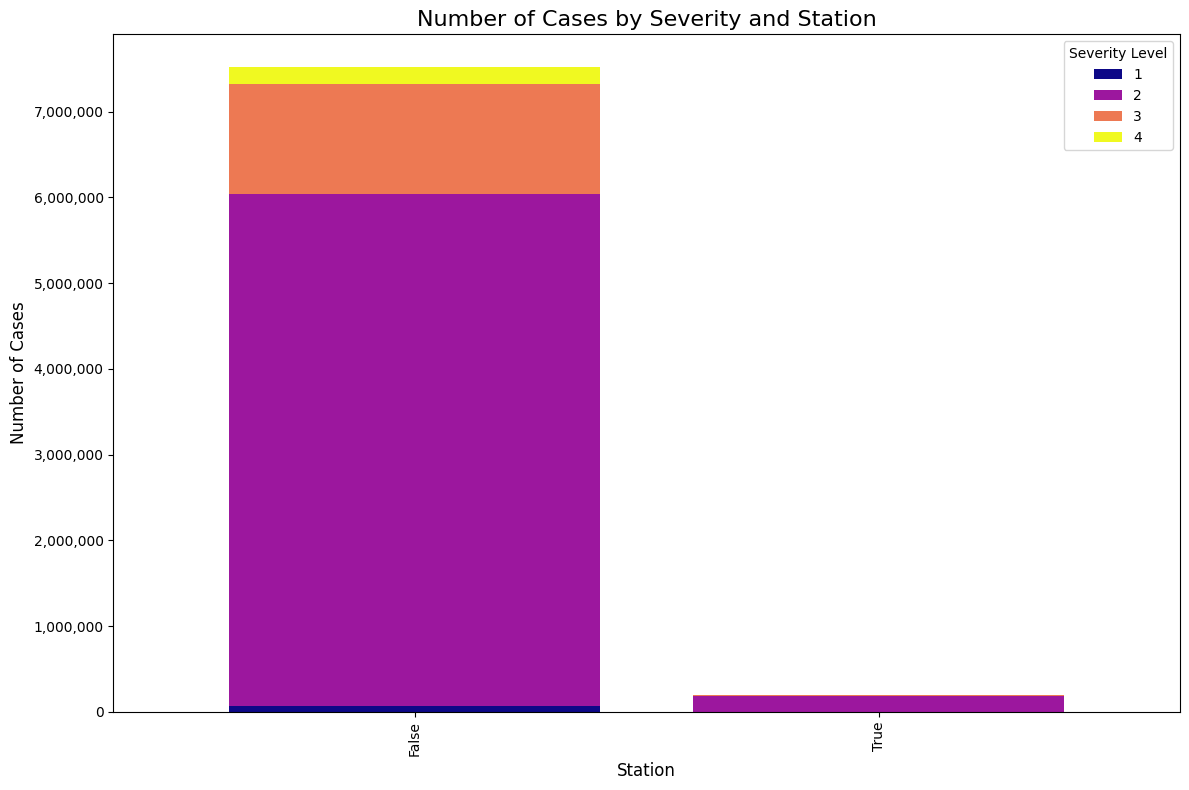

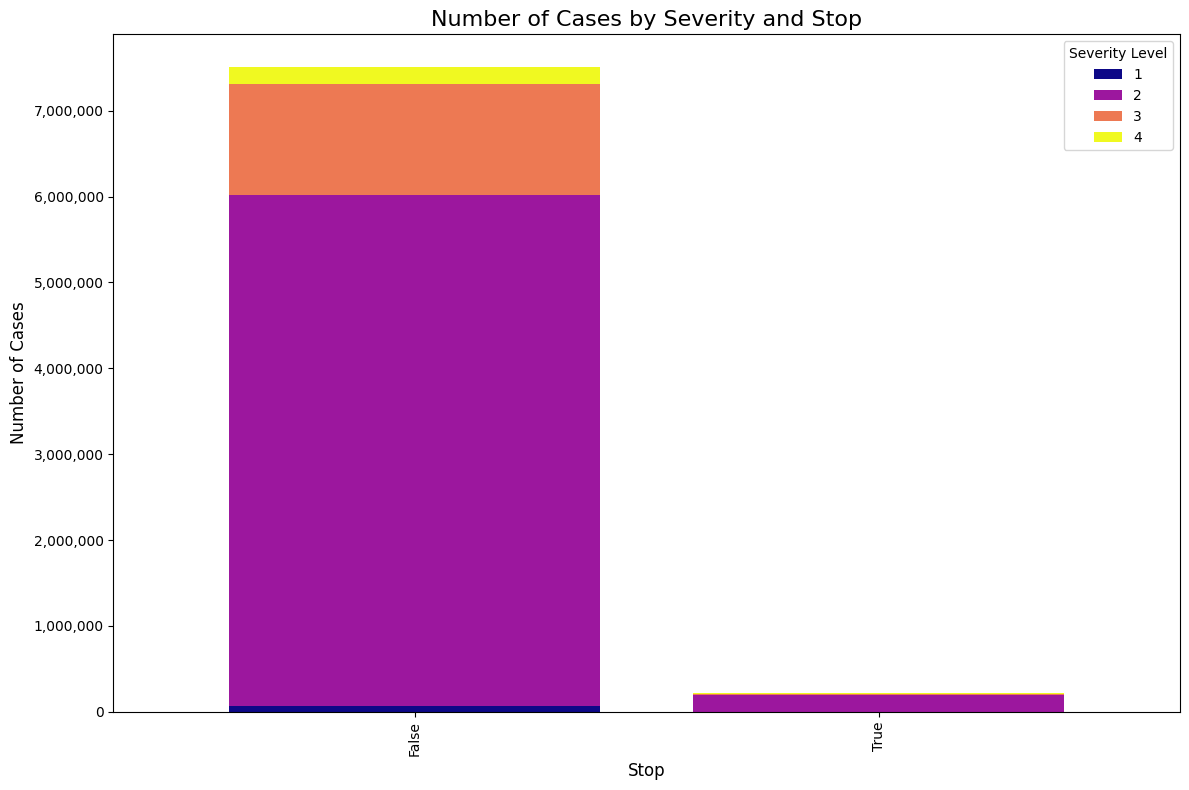

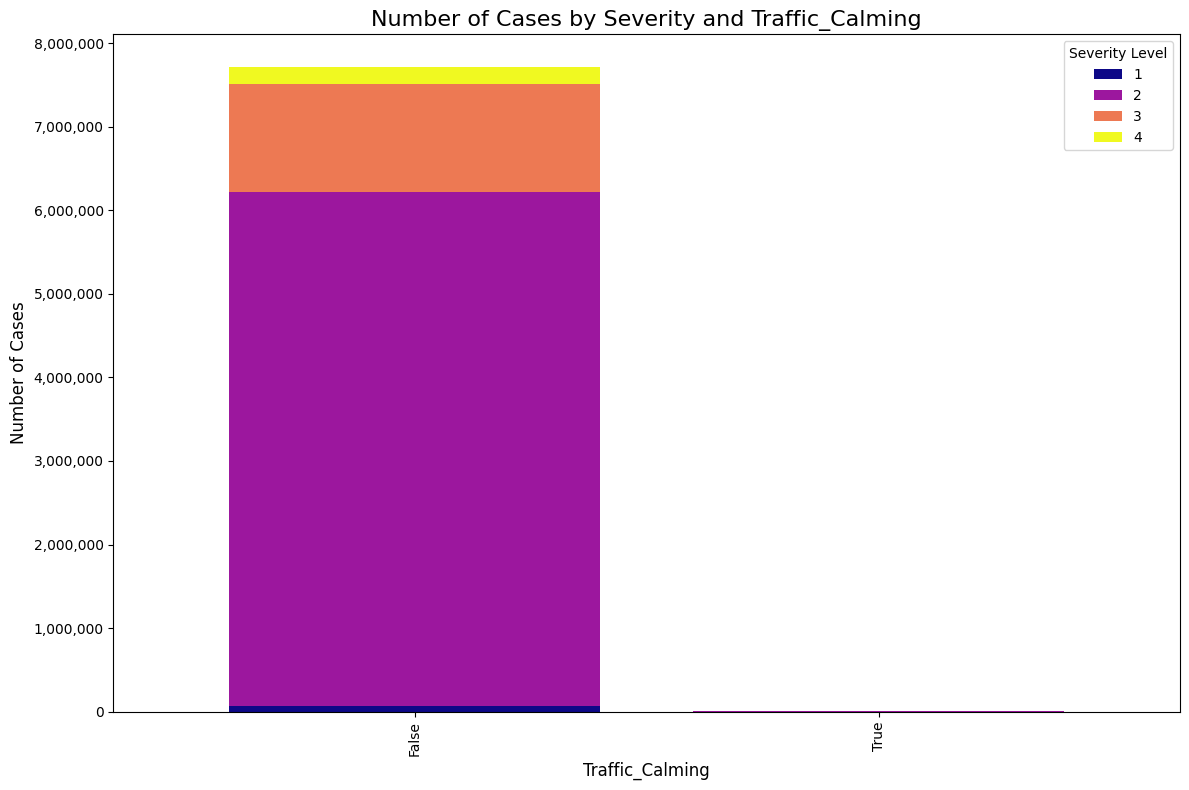

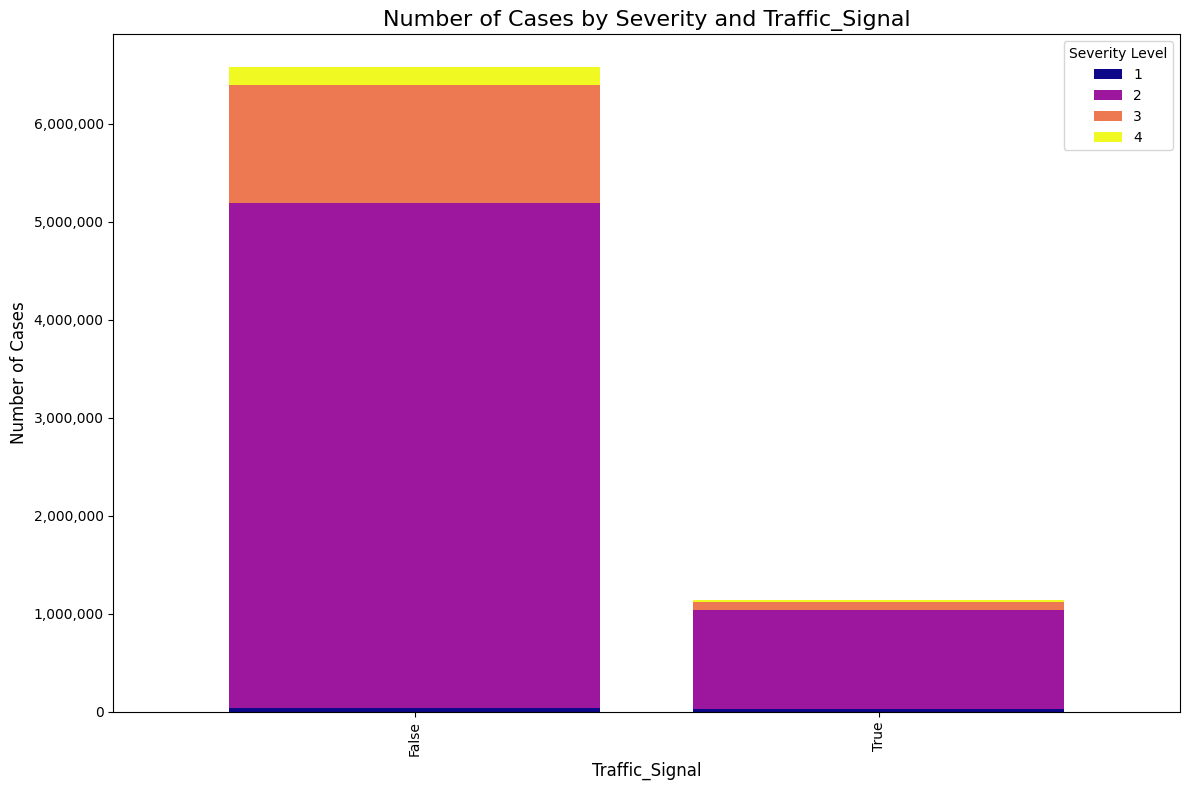

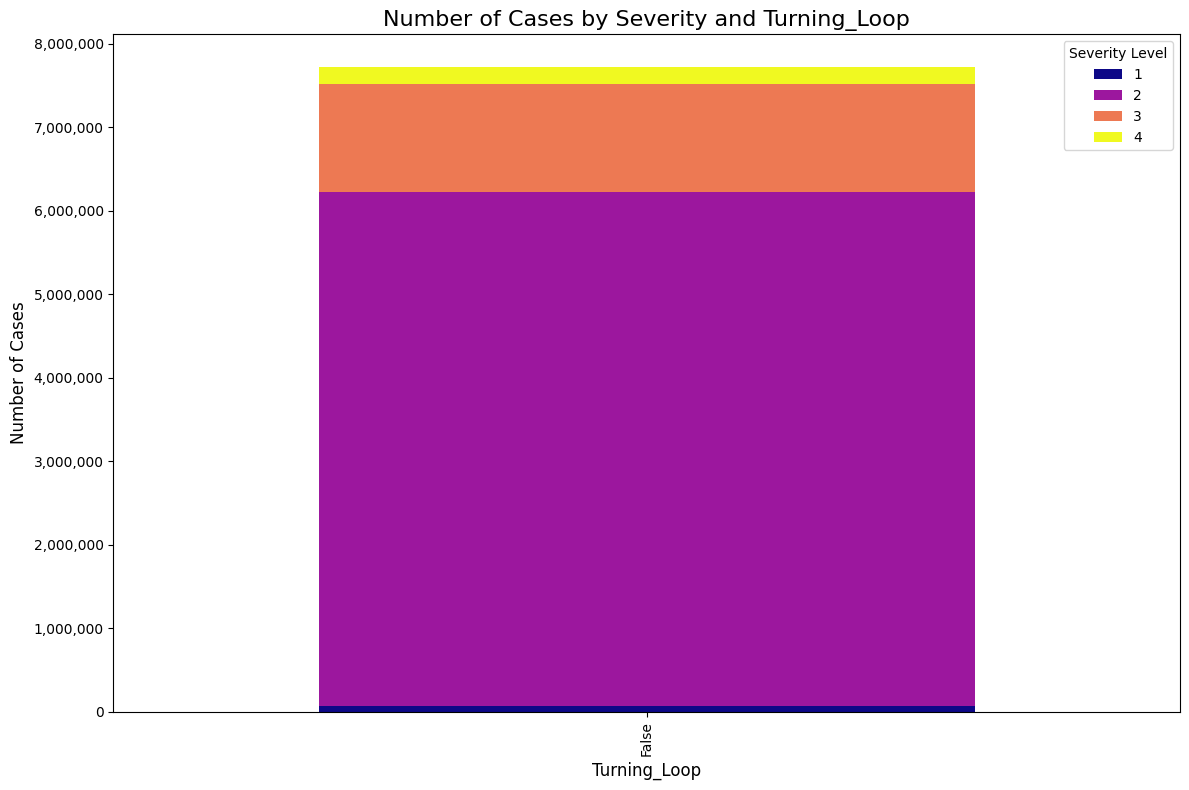

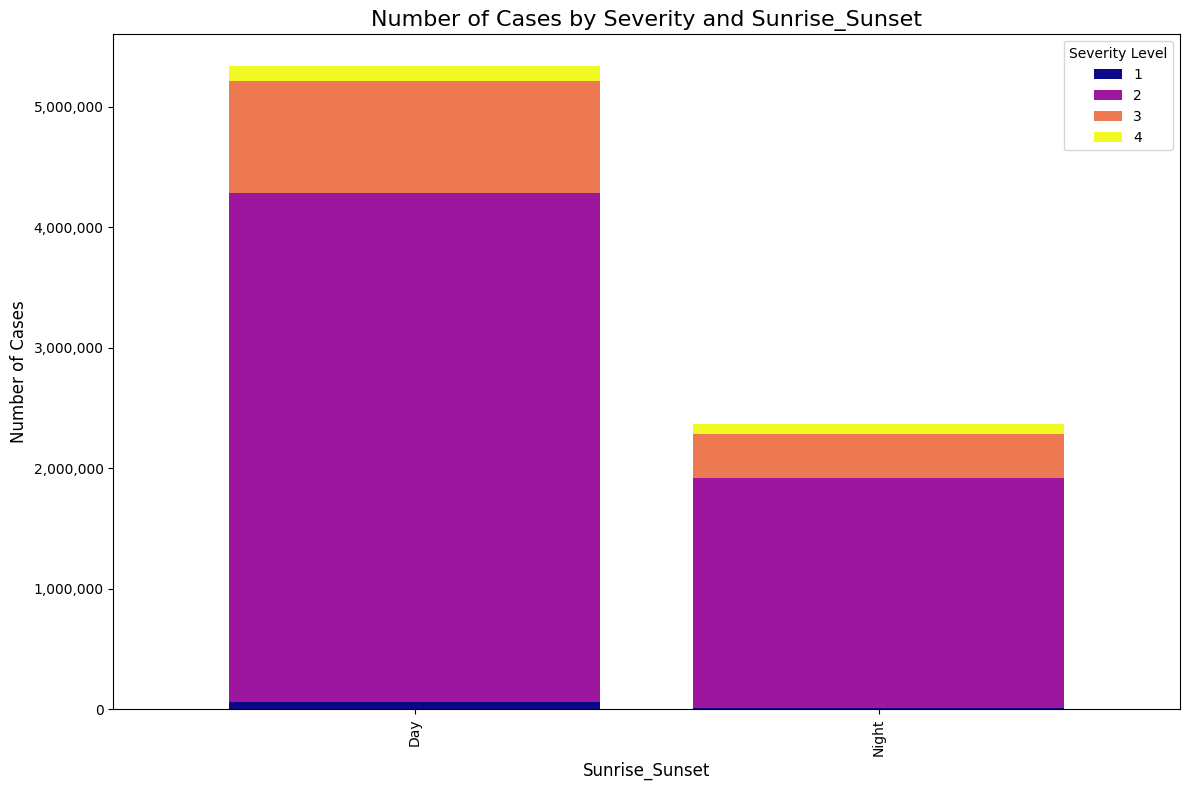

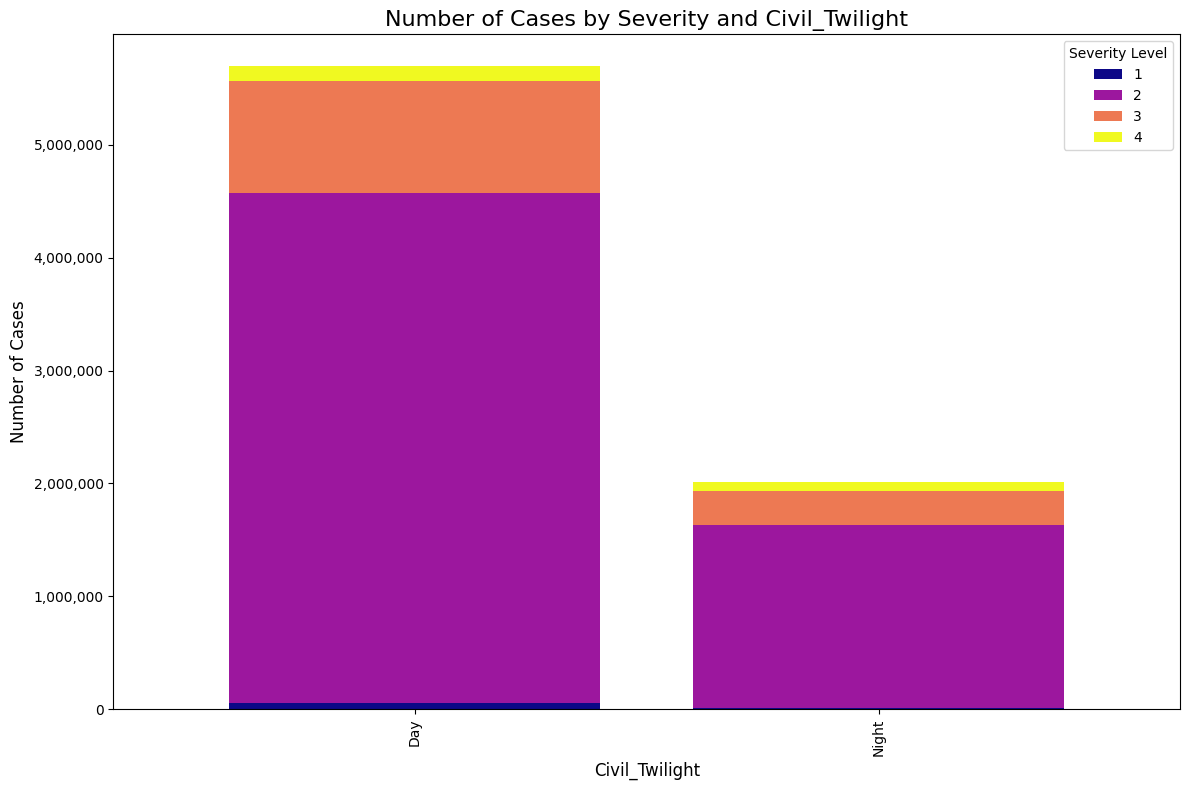

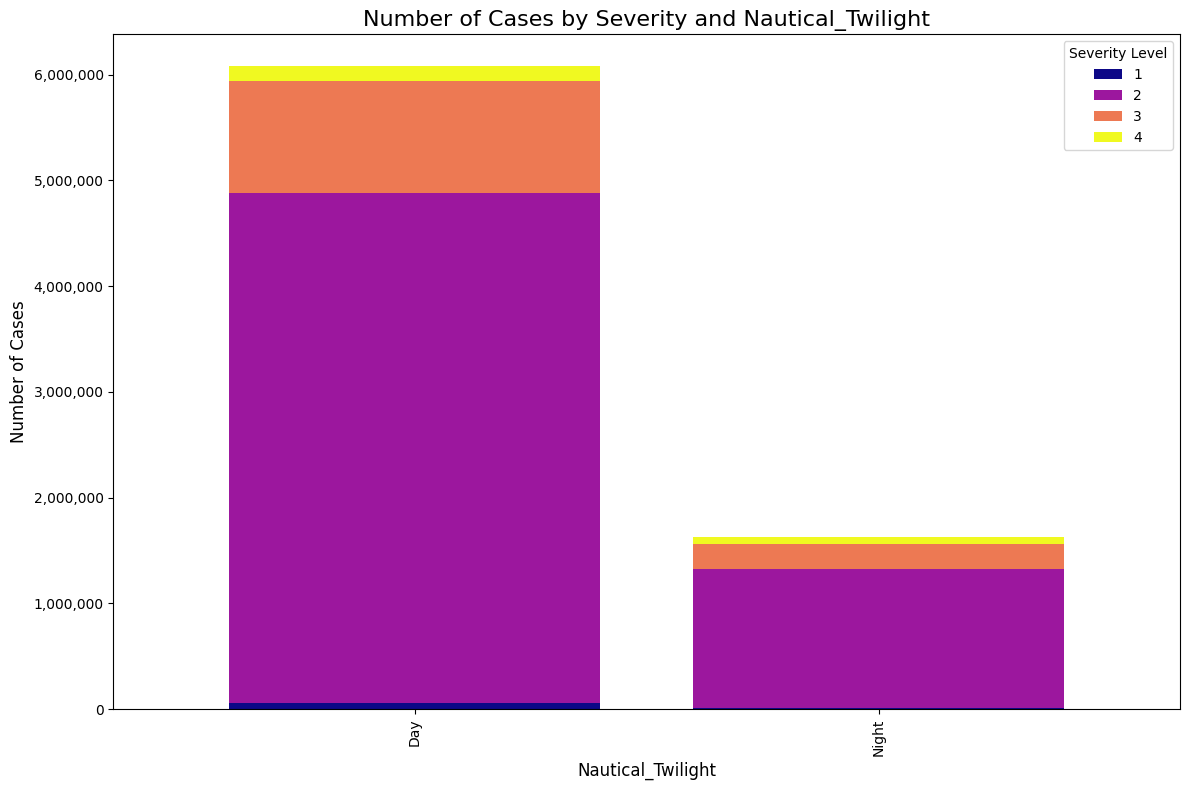

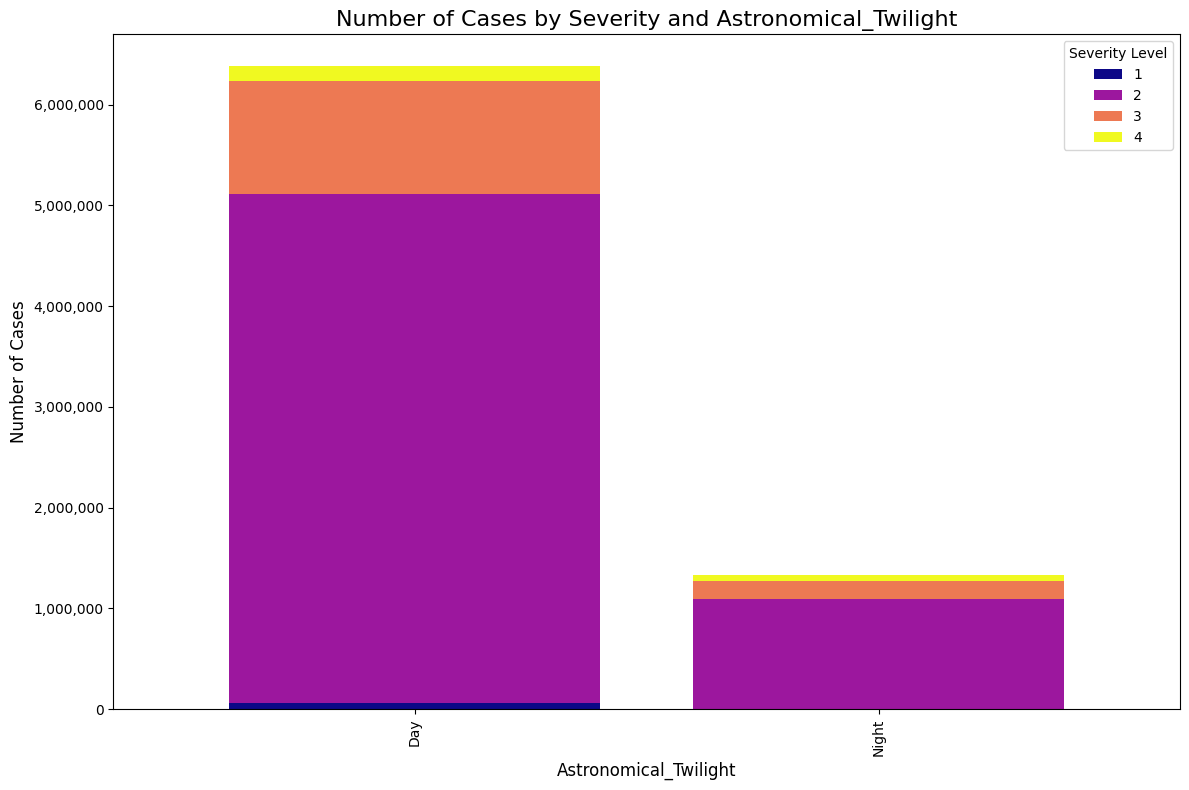

In [23]:
columns_to_plot = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'] 

for column in columns_to_plot: plot_severity_distribution(df, group_by_column=column, top_n=30);

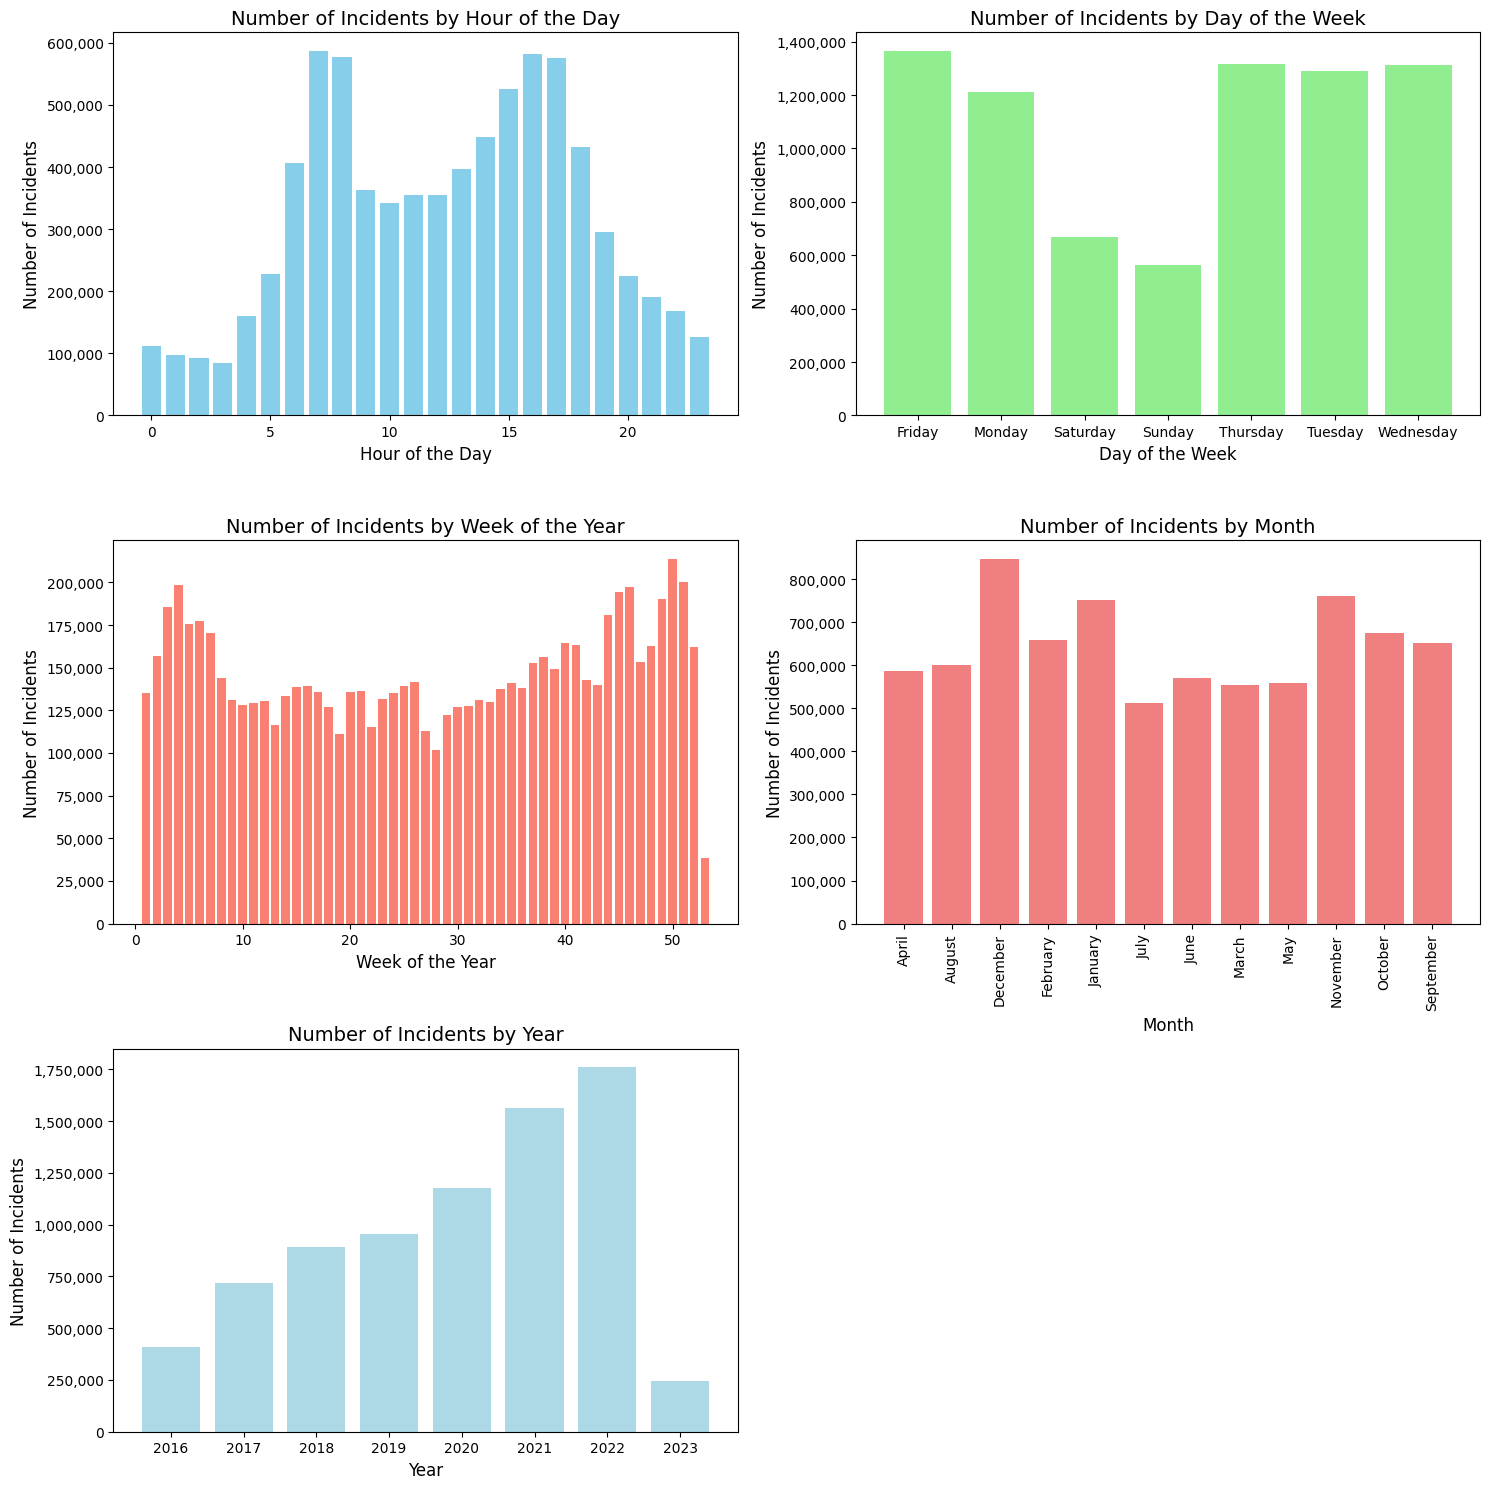

In [24]:
import matplotlib.ticker as ticker

incident_counts_by_time = df['Start_Time'].dt.hour.value_counts().sort_index()
incident_counts_by_day = df['Start_Time'].dt.day_name().value_counts().sort_index()
incident_counts_by_week = df['Start_Time'].dt.isocalendar().week.value_counts().sort_index()
incident_counts_by_month = df['Start_Time'].dt.month_name().value_counts().sort_index()
incident_counts_by_year = df['Start_Time'].dt.year.value_counts().sort_index()

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].bar(incident_counts_by_time.index, incident_counts_by_time.values, color='skyblue')
axs[0, 0].set_title('Number of Incidents by Hour of the Day', fontsize=14)
axs[0, 0].set_xlabel('Hour of the Day', fontsize=12)
axs[0, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[0, 1].bar(incident_counts_by_day.index, incident_counts_by_day.values, color='lightgreen')
axs[0, 1].set_title('Number of Incidents by Day of the Week', fontsize=14)
axs[0, 1].set_xlabel('Day of the Week', fontsize=12)
axs[0, 1].set_ylabel('Number of Incidents', fontsize=12)
axs[1, 0].bar(incident_counts_by_week.index.astype(int), incident_counts_by_week.values, color='salmon')
axs[1, 0].set_title('Number of Incidents by Week of the Year', fontsize=14)
axs[1, 0].set_xlabel('Week of the Year', fontsize=12)
axs[1, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[1, 1].bar(incident_counts_by_month.index, incident_counts_by_month.values, color='lightcoral')
axs[1, 1].set_title('Number of Incidents by Month', fontsize=14)
axs[1, 1].set_xlabel('Month', fontsize=12) 
axs[1, 1].set_ylabel('Number of Incidents', fontsize=12)
axs[1, 1].tick_params(axis='x', labelrotation=90)

axs[2, 0].bar(incident_counts_by_year.index, incident_counts_by_year.values, color='lightblue')
axs[2, 0].set_title('Number of Incidents by Year', fontsize=14)
axs[2, 0].set_xlabel('Year', fontsize=12)
axs[2, 0].set_ylabel('Number of Incidents', fontsize=12)

axs[2, 1].axis('off')
for ax in axs.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

In [25]:
import plotly.express as px

state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Incident_Count'] 

fig = px.choropleth(
    state_counts,
    locations='State',            
    locationmode='USA-states',    
    color='Incident_Count',      
    scope='usa',           
    title='Number of Incidents by State',
    color_continuous_scale='Blues'
)


In [26]:
df.isna().sum() 

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [27]:
missval_perc = (df.isna().sum() / len(df)) * 100
print(missval_perc.sort_values(ascending=False)) 

End_Lng                  44.029355
End_Lat                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
ID                        0.000000
Distance(mi)              0.000000
Start_Lng                 0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

In [28]:
df.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)'], inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int8          
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float32       
 6   Start_Lng              float32       
 7   Distance(mi)           float32       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      object        
 18  Temperature(F)        

In [30]:
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True) 

C:\Users\karth\AppData\Local\Temp\ipykernel_7924\3449152342.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karth\AppData\Local\Temp\ipykernel_7924\3449152342.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [31]:
cat_cols = ['Weather_Condition', 'Wind_Direction', 'Timezone', 'Sunrise_Sunset', 'Airport_Code']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\karth\AppData\Local\Temp\ipykernel_7924\2121805252.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp        120228
Temperature(F)                0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [35]:
df['Weather_Timestamp'].ffill(inplace=True) 

twilight_cols = ['Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight']
for col in twilight_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\karth\AppData\Local\Temp\ipykernel_7924\1544656639.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\karth\AppData\Local\Temp\ipykernel_7924\1544656639.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [36]:
df.dropna(subset=['Description', 'Street', 'City', 'Zipcode', 'Timezone'], inplace=True)

In [37]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T